## Agência Nacional do Cinema - ANCINE

### Um estudo sobre o perfil dos Agentes Econômicos da Indústria Cinematográfica Brasileira

#### **Análise Exploratória de Dados**

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre o conjunto de dados abertos ANCINE - Agência Nacional do Cinema. 

Neste estudo, foram explorados os dados referentes aos Agentes Econômicos cadastrados na ANCINE, assim como suas atividades, Investidores,  Obras cinematográficas, Projetos contratados e outros. 


## Contexto de Negócio

A qualidade e a amplitude da indústria cinematográfica de um país são reflexos não apenas da sua cultura e sociedade, mas também das suas aspirações, desafios e conquistas. No Brasil, embora a indústria cinematográfica seja ativa e produza um número considerável de filmes anualmente em comparação com países de economias semelhantes, ela enfrenta uma batalha cultural com o cinema estrangeiro, principalmente o norte-americano.

O consumo de entretenimento audiovisual no Brasil é largamente dominado pela indústria estadunidense, em parte devido à sua habilidade de produzir filmes com grandes orçamentos e alto apelo comercial. Isso coloca as produções locais em uma competição desafiadora, muitas vezes com recursos financeiros e de marketing limitados em comparação com seus concorrentes estrangeiros.

Um dos principais fatores a considerar é a disparidade no acesso aos recursos dentro da indústria cinematográfica. Enquanto grandes estúdios e produções de alto orçamento geralmente conseguem financiamento e apoio comercial mais facilmente, cineastas independentes e produções de menor escala muitas vezes enfrentam dificuldades para garantir financiamento e distribuição adequada.

Além disso, as políticas públicas e os incentivos governamentais desempenham um papel crucial na sustentabilidade da indústria cinematográfica nacional. Investimentos em programas de financiamento, subsídios e incentivos fiscais podem ajudar a impulsionar a produção local e promover uma maior diversidade de vozes e perspectivas no cinema brasileiro.



---

## 0. Definição do Problema

#### 0.1 Objetivos

O principal objetivo deste projeto é analisar os dados da indústria cinematográfica brasileira para compreender melhor os desafios financeiros e socioeconômicos enfrentados pelos agentes econômicos. Buscamos identificar padrões de comportamento, analisar as projeções de crescimento entre polos locais e a indústria nacional como um todo, além de fomentar a transparência no mercado audiovisual. Nossa meta é promover um ambiente mais sustentável e diversificado para a produção nacional de filmes, além de trazer à luz informações valiosas sobre a indústria do qual os Agentes Econômicos estão inseridos.

####  0.2 Perguntas


    * Como é a distribuição geográfica dos Agentes Econômicos no Brasil?  
    * Quais estados possuem mais Agentes?  
    * O mercado vem crescendo ou diminuindo ao longo dos anos?  
    * Quais leis de incentivos fiscais com maiores índices de arrecadação?  
    * Renúncia Fiscal X Fundo Setorial Audivisual: Números alcançados  

#### 0.3 Entrega de Resultados

O projeto tem como meta de entrega um resultado em formato de relatório executivo por ser mais acessivel e de fácil entendimento para o público em geral. Além do relatório, será disponibilizado toda estrutura e documentação do projeto no repositório do Github.

## 1. Importação das Bibliotecas

In [13]:
#Importação das Bibliotecas

#Padrão
import math
import warnings
from collections import Counter as co

#Externas
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from wordcloud import WordCloud as wc
from scipy import stats

from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error as msqerr
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt, gridspec
from matplotlib import font_manager as fm
import matplotlib.patches as patches

In [14]:
warnings.filterwarnings("ignore")

## 2. Carregamento/Coleta de dados

#### 2.1 Carregando arquivos .CSV

In [ ]:
agentes_economicos = pd.read_csv('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\data\\AgentesEconomicosRegulares.csv', encoding='latin1', sep=';')
agnts_economicos = pd.DataFrame(agentes_economicos)
#
atividades_economicas_agentes = pd.read_csv('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\data\\AtividadesEconomicasAgentesRegulares.csv', encoding='latin1', sep=';')
atividade_economicas_agnts = pd.DataFrame(atividades_economicas_agentes)
#
projetos_renuncia_fiscal = pd.read_csv('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\data\\ProjetosRenunciaFiscal.csv', encoding='latin1', sep=';') 
proj_renuncia_fiscal = pd.DataFrame(projetos_renuncia_fiscal)
#
investidores_projetos_renuncia_fiscal = pd.read_csv('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\data\\InvestidoresEmProjetosRenunciaFiscal.csv', encoding='latin1', sep=';')
investidores_proj_renuncia_fiscal = pd.DataFrame(investidores_projetos_renuncia_fiscal)
#
produtoras_independentes = pd.read_csv('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\data\\ProdutorasIndependentes.csv', encoding='latin1', sep=';')
produtoras_independentes = pd.DataFrame(produtoras_independentes)
#
projetos_contratados_fsa_desembolso = pd.read_csv('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\data\\ProjetosContratadosFSAeDesembolso.csv', encoding='latin1', sep=';')
proj_fsa_desembolso =  pd.DataFrame(projetos_contratados_fsa_desembolso)


### 2.1 Unificar Tabelas

Para maior eficiência no código, vamos unificar as tabelas "Agentes Econômicos" e "Atividade dos Agentes Econômicos"

##### 1.2.1 Agentes Econômicos x Atividade dos Agentes Econômicos x Produtores Independentes

In [15]:
def unificar_tabelas_agentes(): #Criando Dataframe merged Agentes Economicos Regulares x Atividades Economicas dos Agentes

    agnts_atividades_economicas = pd.merge(agnts_economicos, atividade_economicas_agnts, on='REGISTRO_ANCINE', how='inner') #Merge tabelas agnt econômicos e atividades
    agnts_atividades_economicas = agnts_atividades_economicas[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'RAZAO_SOCIAL_x', 'CNPJ_x', #selecionando colunas
        'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO', 'NATUREZA_JURIDICA', 'ATIVIDADE_ECONOMICA','CLASSIFICACAO_ATIVIDADE', 'BRASILEIRO_INDEPENDENTE']]

    agnts_atividades_economicas.rename(columns={'RAZAO_SOCIAL_x' : 'RAZAO_SOCIAL', 'CNPJ_x' : 'CNPJ'}, inplace=True) #corrigindo nomes das colunas

    agnts_atividades_economicas = agnts_atividades_economicas[agnts_atividades_economicas['CLASSIFICACAO_ATIVIDADE'] == 1] # filtrando a colunaClassificação de atividades para deixar apenas as principais, evitando agentes duplicados

    #Produtoras Independentes
    global produtoras_independentes
    global agnts_tabela_unificada
    global tabela_unificada_atividades_economicas

    produtoras_independentes = produtoras_independentes[['REGISTRO_ANCINE', 'CLASSIFICACAO_NIVEL_PRODUTORA']] # selecionando colunas - Produtoras Independentes
    agnts_tabela_unificada = pd.DataFrame(pd.merge(agnts_atividades_economicas, produtoras_independentes, how='outer', on='REGISTRO_ANCINE')) #Merge tabelas
    agnts_tabela_unificada.dropna(subset='CLASSIFICACAO_NIVEL_PRODUTORA', inplace=True)

    agnts_tabela_unificada = agnts_tabela_unificada.drop_duplicates(subset=['CNPJ'])
unificar_tabelas_agentes()

##### 1.2.3 FSA Desembolso / Renúncia Fiscal x Agentes Econômicos (tabela unificada)

In [99]:
produtoras_proj_renun_fiscal = proj_renuncia_fiscal.copy()
produtoras_proj_renun_fiscal = agnts_tabela_unificada.merge(produtoras_proj_renun_fiscal, left_on='CNPJ', right_on='CNPJ_PROPONENTE')
produtoras_proj_renun_fiscal = produtoras_proj_renun_fiscal[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'RAZAO_SOCIAL', 'CNPJ',
       'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO', 'NATUREZA_JURIDICA',
       'ATIVIDADE_ECONOMICA', 'CLASSIFICACAO_NIVEL_PRODUTORA', 'TITULO_PROJETO', 'LEI_8313', 'ART1',
       'ART1A', 'ART3', 'ART3A', 'ART39', 'FUNCINES', 'TOTAL_CAPTADO',
       'DT_APROVACAO_CAPTACAO', 'DT_1_LIBERACAO']]


produtoras_proj_fsa_desembolso = proj_fsa_desembolso.copy()
produtoras_proj_fsa_desembolso = agnts_tabela_unificada.merge(produtoras_proj_fsa_desembolso, left_on='CNPJ', right_on='CNPJ_PROPONENTE')
produtoras_proj_fsa_desembolso = produtoras_proj_fsa_desembolso[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'RAZAO_SOCIAL', 'CNPJ',
       'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO', 'NATUREZA_JURIDICA',
       'ATIVIDADE_ECONOMICA', 'CLASSIFICACAO_NIVEL_PRODUTORA', 'TITULO_PROJETO',
       'CHAMADA_PUBLICA', 'ANO_CHAMADA_PUBLICA', 'DT_PUBLICACAO_CONTRATO_DOU',
       'VL_CONTRATO_DOU', 'DT_PRIMEIRO_DESEMBOLSO', 'VL_TOTAL_LIBERADO']]


# FSA - DESEMBOLSO
fsa_desembolso = produtoras_proj_fsa_desembolso.copy()
fsa_desembolso['ANO_CHAMADA_PUBLICA'] = fsa_desembolso['ANO_CHAMADA_PUBLICA'].str.split('/').str[-1] 
fsa_desembolso['ANO_CHAMADA_PUBLICA'] = pd.to_numeric(fsa_desembolso['ANO_CHAMADA_PUBLICA'])

data_ficticia = pd.to_datetime('1900-12-31')
fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'].fillna(data_ficticia, inplace=True)
fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'] = pd.to_datetime(fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'])

fsa_desembolso['DT_PUBLICACAO_CONTRATO_DOU'] = pd.to_datetime(fsa_desembolso['DT_PUBLICACAO_CONTRATO_DOU'])

fsa_desembolso['VL_CONTRATO_DOU'] = fsa_desembolso['VL_CONTRATO_DOU'].str.replace(',', '.').astype(float)

fsa_desembolso['VL_TOTAL_LIBERADO'] = fsa_desembolso['VL_TOTAL_LIBERADO'].str.replace(',', '.').astype(float)
fsa_desembolso['VL_TOTAL_LIBERADO'].fillna(0, inplace=True)

fsa_desembolso['CLASSIFICACAO_NIVEL_PRODUTORA'] = fsa_desembolso['CLASSIFICACAO_NIVEL_PRODUTORA'].astype(int)

fsa_desembolso['TITULO_PROJETO'].fillna('Sem Título', inplace=True)

# RENÚNICA FISCAL
renuncia_fiscal = produtoras_proj_renun_fiscal.copy()

renuncia_fiscal['CLASSIFICACAO_NIVEL_PRODUTORA'] = renuncia_fiscal['CLASSIFICACAO_NIVEL_PRODUTORA'].astype(int)

def float_int(coluna):
    zero = '0,0'

    renuncia_fiscal[coluna] = renuncia_fiscal[coluna].str.replace(',', '.').astype(float)

float_int('LEI_8313')
float_int('ART1')
float_int('ART1A')
float_int('ART3')
float_int('ART3A')
float_int('ART39')
float_int('FUNCINES')
float_int('TOTAL_CAPTADO')

### 2.2 Visualizar Tabela

In [100]:
#Função que retorne o perfil de um banco de dados
def perfil_banco_dados(df):
    duplicado = df['CNPJ'].duplicated()
    soma_duplicado = duplicado.sum()
    
    print('Raio-x')
    print()
    print(df.info())
    print('----')
    
    if soma_duplicado > 0:
        print(f'A coluna CNPJ possui {soma_duplicado} valores duplicados.')
    else:
        print('A coluna CNPJ não possui valores duplicados.')
    
    print('----')
    return df.sample(5)

##### 1.3.2 Agentes (tabela unificada)

In [101]:
perfil_banco_dados(agnts_tabela_unificada)

Raio-x

<class 'pandas.core.frame.DataFrame'>
Index: 11354 entries, 0 to 18571
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   REGISTRO_ANCINE                11354 non-null  int64         
 1   DATA_REGISTRO                  11354 non-null  datetime64[ns]
 2   RAZAO_SOCIAL                   11354 non-null  object        
 3   CNPJ                           11354 non-null  object        
 4   DATA_CONSTITUICAO              11354 non-null  datetime64[ns]
 5   UF                             11354 non-null  object        
 6   MUNICIPIO                      11354 non-null  object        
 7   NATUREZA_JURIDICA              11354 non-null  object        
 8   ATIVIDADE_ECONOMICA            11354 non-null  object        
 9   CLASSIFICACAO_ATIVIDADE        11354 non-null  int64         
 10  BRASILEIRO_INDEPENDENTE        11354 non-null  bool          
 11  CLASSIFICACA

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,CNPJ,DATA_CONSTITUICAO,UF,MUNICIPIO,NATUREZA_JURIDICA,ATIVIDADE_ECONOMICA,CLASSIFICACAO_ATIVIDADE,BRASILEIRO_INDEPENDENTE,CLASSIFICACAO_NIVEL_PRODUTORA
5501,31897,2016-01-21,DUPLA CRIAÇÃO & PUBLICIDADE LTDA - ME,04.113.319/0001-84,2000-07-10,MA,SÃO LUÍS,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",1,True,1.0
14384,51609,2022-07-12,FEF PRODUÇÕES ARTISTICAS LTDA,45.114.202/0001-00,2022-02-02,GO,GOIÂNIA,Sociedade Empresária Limitada,Produção musical,1,True,1.0
14385,51610,2022-07-12,"UALL CREATIVE INDÚSTRIA, COMÉRCIO E SERVIÇOS L...",07.642.769/0001-52,2005-10-19,SC,SÃO JOSÉ,Sociedade Empresária Limitada,Comércio atacadista de outros equipamentos e a...,1,True,1.0
5262,30539,2015-07-23,LUARAN P. LINS,08.820.791/0001-08,2007-05-15,MA,IMPERATRIZ,Empresário (Individual),Produção de filmes para publicidade,1,True,1.0
4939,28936,2015-02-09,VIEW SIZE PUBLICIDADE LTDA-ME,21.518.070/0001-06,2014-12-03,RJ,CABO FRIO,Sociedade Empresária Limitada,Agências de publicidade,1,True,1.0


##### 1.3.3 FSA - Desembolso

In [102]:
perfil_banco_dados(fsa_desembolso)

Raio-x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   REGISTRO_ANCINE                3353 non-null   int64         
 1   DATA_REGISTRO                  3353 non-null   datetime64[ns]
 2   RAZAO_SOCIAL                   3353 non-null   object        
 3   CNPJ                           3353 non-null   object        
 4   DATA_CONSTITUICAO              3353 non-null   datetime64[ns]
 5   UF                             3353 non-null   object        
 6   MUNICIPIO                      3353 non-null   object        
 7   NATUREZA_JURIDICA              3353 non-null   object        
 8   ATIVIDADE_ECONOMICA            3353 non-null   object        
 9   CLASSIFICACAO_NIVEL_PRODUTORA  3353 non-null   int32         
 10  TITULO_PROJETO                 3353 non-null   object        
 11  CHAMADA_P

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,CNPJ,DATA_CONSTITUICAO,UF,MUNICIPIO,NATUREZA_JURIDICA,ATIVIDADE_ECONOMICA,CLASSIFICACAO_NIVEL_PRODUTORA,TITULO_PROJETO,CHAMADA_PUBLICA,ANO_CHAMADA_PUBLICA,DT_PUBLICACAO_CONTRATO_DOU,VL_CONTRATO_DOU,DT_PRIMEIRO_DESEMBOLSO,VL_TOTAL_LIBERADO
11,43,2003-03-24,FILMES DO EQUADOR LTDA.,73.619.637/0001-34,1993-10-22,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",5,FLORES RARAS,PRODECINE 01,2009,2011-11-07,2500000.0,2012-06-01,2500000.0
2418,19305,2011-07-20,DOBLECHAPA CINEMATOGRAFIA LTDA,13.510.088/0001-33,2011-03-30,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",3,SETE VIDAS EM SETE CORDAS,PRODAV 01,2012,2013-12-06,314000.0,2014-03-21,314000.0
2436,19413,2011-08-09,CLARTE SERVIÇOS DE FOTO E CINEMA LTDA ME,12.475.126/0001-00,2010-09-02,PA,BELÉM,Sociedade Empresária Limitada,"Atividades de produção de fotografias, exceto ...",1,PASSAGEM ESPERANÇA,PRODAV 04,2014,2016-12-05,70000.0,2017-01-18,70000.0
444,762,2002-11-14,KINOTV LTDA.,02.298.682/0001-96,1997-12-08,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",4,STELLA MODELS,PRODAV 01,2013,2016-01-11,900000.0,2016-01-18,900000.0
2190,17274,2010-06-23,SPLIT STUDIO PRODUÇÕES AUDIOVISUAIS LTDA.,11.717.663/0001-48,2010-03-16,SP,SÃO PAULO,Sociedade Empresária Limitada,Estúdios cinematográficos,2,BOOMIES,SAV/MINC 08,2018,2020-12-17,999997.9,2020-12-22,999997.9


##### 1.3.4 Renúncia Fiscal

In [103]:
perfil_banco_dados(renuncia_fiscal)

Raio-x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   REGISTRO_ANCINE                2609 non-null   int64         
 1   DATA_REGISTRO                  2609 non-null   datetime64[ns]
 2   RAZAO_SOCIAL                   2609 non-null   object        
 3   CNPJ                           2609 non-null   object        
 4   DATA_CONSTITUICAO              2609 non-null   datetime64[ns]
 5   UF                             2609 non-null   object        
 6   MUNICIPIO                      2609 non-null   object        
 7   NATUREZA_JURIDICA              2609 non-null   object        
 8   ATIVIDADE_ECONOMICA            2609 non-null   object        
 9   CLASSIFICACAO_NIVEL_PRODUTORA  2609 non-null   int32         
 10  TITULO_PROJETO                 2609 non-null   object        
 11  LEI_8313 

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,CNPJ,DATA_CONSTITUICAO,UF,MUNICIPIO,NATUREZA_JURIDICA,ATIVIDADE_ECONOMICA,CLASSIFICACAO_NIVEL_PRODUTORA,...,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO
2234,18031,2010-11-30,DOIS MOLEQUES PRODUÇÕES LTDA,12.375.637/0001-41,2010-07-21,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",2,...,0.0,0.0,0.0,0.00,960000.0,0.0,0.0,960000.00,2014-07-24,2015-11-18
1568,2698,2004-11-24,PANORAMICA COMUNICACAO LTDA.,05.565.485/0001-84,2003-03-17,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",5,...,0.0,0.0,0.0,72896.16,0.0,0.0,0.0,72896.16,2011-04-15,2011-12-23
1233,1119,2003-05-15,REGINA FILMES LTDA,42.164.699/0001-75,1972-08-25,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",4,...,500000.0,896399.0,0.0,0.00,0.0,0.0,0.0,1396399.00,1998-05-18,1999-12-17
1889,11871,2007-01-26,OKNA PRODUÇÕES CULTURAIS LTDA,08.267.476/0001-03,2006-08-15,RS,PORTO ALEGRE,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",5,...,0.0,0.0,1300000.0,0.00,0.0,0.0,0.0,1300000.00,2016-07-01,2018-04-25
1663,4223,2005-06-14,REFINARIA PRODUÇÕES LTDA.,05.436.489/0001-62,2002-12-11,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",4,...,0.0,0.0,600000.0,0.00,0.0,0.0,0.0,600000.00,2011-09-27,2013-11-05


### 2.3 Dimensões e NA

In [104]:
def dimensao_na(df, df_name=None):

    unique_values = df.apply(lambda x: x.nunique())
    null_values = df.isnull().sum()

    nome_df = pd.DataFrame({
        'Quantidade de Valores' : unique_values.values,
        'Tipo da Coluna' : df.dtypes,
        'Quantidade de Nulos' : null_values.values   
    }).reset_index()

    print(f"DataFrame name: {df_name}")
    return nome_df

##### 1.4.2 Agentes (tabela unificada)

In [105]:
dimensao_na(agnts_tabela_unificada, "Agentes Econômicos - Tabela Unificada")

DataFrame name: Agentes Econômicos - Tabela Unificada


,index,Quantidade de Valores,Tipo da Coluna,Quantidade de Nulos
0,REGISTRO_ANCINE,11354,int64,0
1,DATA_REGISTRO,3838,datetime64[ns],0
2,RAZAO_SOCIAL,11343,object,0
3,CNPJ,11354,object,0
4,DATA_CONSTITUICAO,5651,datetime64[ns],0
5,UF,27,object,0
6,MUNICIPIO,681,object,0
7,NATUREZA_JURIDICA,10,object,0
8,ATIVIDADE_ECONOMICA,186,object,0
9,CLASSIFICACAO_ATIVIDADE,1,int64,0


##### 1.4.3 FSA Desembolso

In [106]:
dimensao_na(fsa_desembolso, "FSA- Desembolso")

DataFrame name: FSA- Desembolso


,index,Quantidade de Valores,Tipo da Coluna,Quantidade de Nulos
0,REGISTRO_ANCINE,1122,int64,0
1,DATA_REGISTRO,939,datetime64[ns],0
2,RAZAO_SOCIAL,1122,object,0
3,CNPJ,1122,object,0
4,DATA_CONSTITUICAO,1037,datetime64[ns],0
5,UF,27,object,0
6,MUNICIPIO,109,object,0
7,NATUREZA_JURIDICA,8,object,0
8,ATIVIDADE_ECONOMICA,38,object,0
9,CLASSIFICACAO_NIVEL_PRODUTORA,5,int32,0


##### 1.4.4 Renúncia Fiscal

In [107]:
dimensao_na(renuncia_fiscal, "Renúncia Fiscal")

DataFrame name: Renúncia Fiscal


,index,Quantidade de Valores,Tipo da Coluna,Quantidade de Nulos
0,REGISTRO_ANCINE,755,int64,0
1,DATA_REGISTRO,629,datetime64[ns],0
2,RAZAO_SOCIAL,755,object,0
3,CNPJ,755,object,0
4,DATA_CONSTITUICAO,726,datetime64[ns],0
5,UF,19,object,0
6,MUNICIPIO,59,object,0
7,NATUREZA_JURIDICA,8,object,0
8,ATIVIDADE_ECONOMICA,21,object,0
9,CLASSIFICACAO_NIVEL_PRODUTORA,5,int32,0


---

## 3. EDA - Análise Exploratória dos Dados

#### Atividades Econômicas dos Agentes

##### 3.1 Sumário e Nuvem de Palavras

In [108]:
#Além de dados estatísticos sobre as atividades econômicas, vamos extrair nuvens de palavras encontradas nas 
#atividades mais recorrentes e menos recorrentes das produtoras com classificação de nível.

#Criar lista de atividades econômicas
lista_atividades = agnts_tabela_unificada['ATIVIDADE_ECONOMICA'].tolist()

palavra = []
for atividade in lista_atividades:
    palavra.extend(atividade.split())

#Excluir outliers 
lista_atividades_counter = co(lista_atividades)
palavra_counter = co(palavra) #Método para contar as palavras
print(f'Número de Atividades Econômicas distintas: {len(lista_atividades_counter)}')

atividade_economica_contagem = pd.DataFrame(agnts_tabela_unificada['ATIVIDADE_ECONOMICA'].value_counts().head(10))
atividade_economica_contagem

Número de Atividades Econômicas distintas: 186


,count
ATIVIDADE_ECONOMICA,
"Atividades de produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente",5488
Produção de filmes para publicidade,1337
Estúdios cinematográficos,676
"Artes cênicas, espetáculos e atividades complementares não especificados anteriormente",462
Agências de publicidade,364
"Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente",363
"Serviços de organização de feiras, congressos, exposições e festas",227
"Atividades de produção de fotografias, exceto aérea e submarina",199
Produção teatral,194


Nuvem de palavras com as 50 mais recorrentes entre as Atividades Econômicas


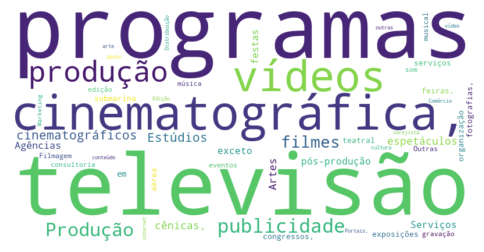

Nuvem de palavras com as 400 menos recorrentes entre as Atividades Econômicas


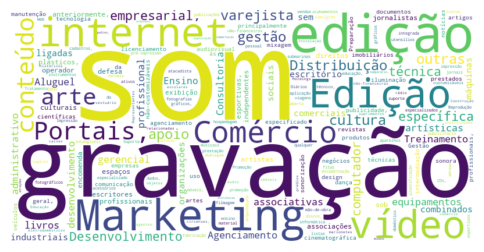

In [109]:
#Lista de palavras da tabela de produtoras independentes para excluir
palavras_excluir = ['de', 'e', 'não', 'anteriormente', 'Atividades', 'especificadas', 'para', 'atividades',\
                     'especificados', 'complementares', 'à', 'na', 'direto', 'outros', 'informação', 'provedores']
palavras_frequencia = [palavra for palavra in palavra if palavra not in palavras_excluir]
# palavras_frequencia = co(palavras_frequencia)
# Suponha que você tenha a lista de palavras filtradas armazenada em 'palavras_frequencia'
palavras_frequencia = [palavra for palavra in palavra if palavra not in palavras_excluir]

# Crie um objeto Counter com as palavras filtradas
contador_palavras = co(palavras_frequencia)

# Obtenha as 25 palavras mais comuns
maior_frequencia = contador_palavras.most_common(50)
menor_frequencia = contador_palavras.most_common()[-399:]

# Converta as palavras e suas frequências em um dicionário
dic_palavras_maior_frequencia = dict(maior_frequencia)
dic_palavras_menor_frequencia = dict(menor_frequencia)

# Crie uma nuvem de palavras para as 25 palavras mais comuns
nuvem_palavras_maior_frequencia = wc(width=800, height=400, background_color='white').generate_from_frequencies(dic_palavras_maior_frequencia)

# Plote a nuvem de palavras para as 25 palavras mais comuns
print('Nuvem de palavras com as 50 mais recorrentes entre as Atividades Econômicas')
plt.figure(figsize=(6, 4))
plt.imshow(nuvem_palavras_maior_frequencia, interpolation='bilinear')
plt.axis('off')
plt.show()

# Crie uma nuvem de palavras para as 415 palavras menos comuns
nuvem_palavras_menor_frequencia = wc(width=800, height=400, background_color='white').generate_from_frequencies(dic_palavras_menor_frequencia)

# Plote a nuvem de palavras para as 415 palavras menos comuns
print('Nuvem de palavras com as 400 menos recorrentes entre as Atividades Econômicas')
plt.figure(figsize=(6, 4))
plt.imshow(nuvem_palavras_menor_frequencia, interpolation='bilinear')
plt.axis('off')
plt.show()

---

##### 3.2 Distribuição dos Agentes Econômicos no País (Produtores Independentes)

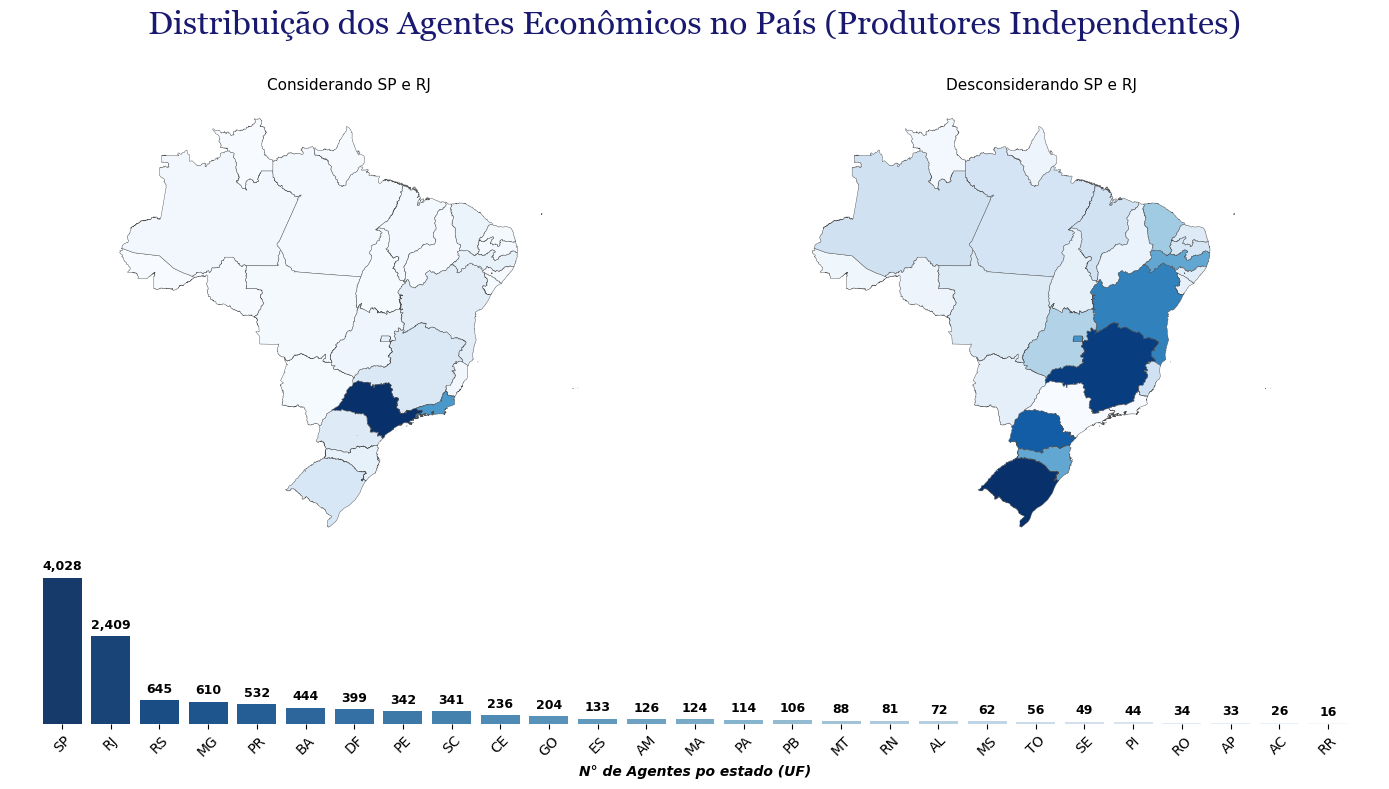

In [110]:
# Carregar mapa BR
brasil = gpd.read_file('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\geopandas\\BR_UF_2022.shp')

# Plot com todos os estados
totais_por_estado = agnts_tabela_unificada['UF'].value_counts().reset_index()
totais_por_estado.columns = ['UF', 'Total']

brasil = brasil.merge(totais_por_estado, left_on='SIGLA_UF', right_on='UF')

# Filtrar os dados excluindo SP e RJ
estados_sem_sp_rj = agnts_tabela_unificada[(agnts_tabela_unificada['UF'] != 'RJ') & (agnts_tabela_unificada['UF'] != 'SP')]
estados_count = estados_sem_sp_rj['UF'].value_counts().reset_index()
estados_count.columns = ['UF', 'Total']

# Adicionar linhas para SP e RJ com total zero
sp_row = pd.DataFrame({'UF': ['SP'], 'Total': [0]})
rj_row = pd.DataFrame({'UF': ['RJ'], 'Total': [0]})
estados_count = pd.concat([estados_count, sp_row, rj_row], ignore_index=True)

estados_count = estados_count.sort_values(by='UF')
estados_count = estados_count.rename(columns={'UF': 'UF_count', 'Total': 'Total_count'})
brasil_estados = brasil.merge(estados_count, left_on='SIGLA_UF', right_on='UF_count')

# Criar a figura
plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], width_ratios=[2, 2])
# Plotar mapa dos estados sem SP e RJ
ax1 = plt.subplot(gs[0,0])
brasil_estados.plot(column='Total', cmap='Blues', linewidth=0.3, ax=ax1, edgecolor='0.3', legend=False)
ax1.set_title('Considerando SP e RJ', fontsize=11, fontweight='light')
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Plotar mapa dos estados com SP e RJ
ax2 = plt.subplot(gs[0,1])
brasil_estados.plot(column='Total_count', cmap='Blues', linewidth=0.3, ax=ax2, edgecolor='0.3', legend=False)
ax2.set_title('Desconsiderando SP e RJ', fontsize=11, fontweight='light')
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Plotar gráfico de barras
ax3 = plt.subplot(gs[1, :])
sns.countplot(data=agnts_tabela_unificada, x='UF', order=agnts_tabela_unificada['UF'].value_counts().index, palette='Blues_r', ax=ax3)
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 8), 
                   textcoords='offset points',
                   fontsize=9, fontweight='bold')
# ax3.set_title('Quantidade de Agentes Econômicos por Estado', fontsize=13, fontweight='medium')
ax3.set_xlabel('N° de Agentes po estado (UF)', fontsize=10, fontweight='bold', fontstyle='oblique')
ax3.set_ylabel(None)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=10, fontweight='normal') 
ax3.set_yticks([])
ax3.margins(0.025)
plt.tight_layout()
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Georgia'}

plt.suptitle('Distribuição dos Agentes Econômicos no País (Produtores Independentes)', fontdict=fontprops, fontsize=24)
plt.subplots_adjust(top=0.87)
plt.show()


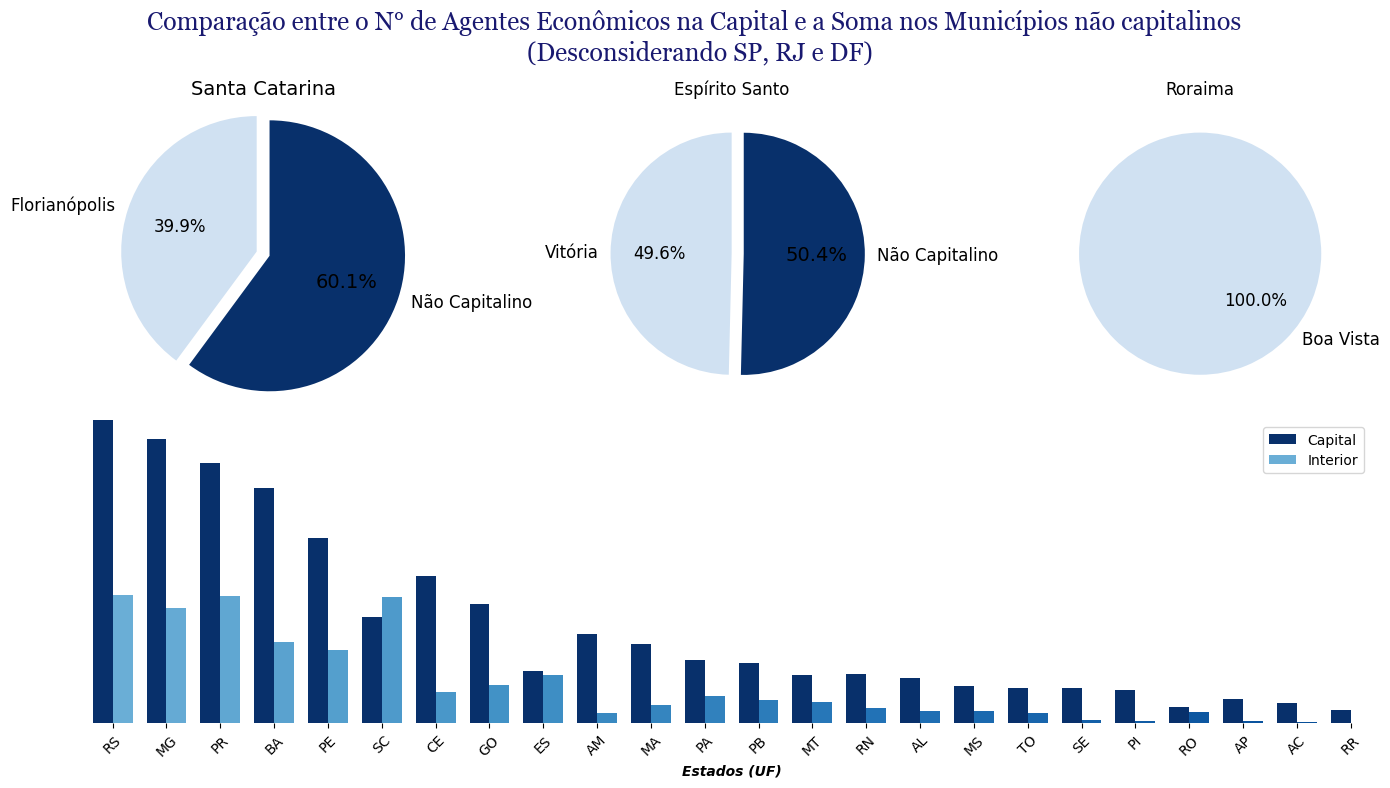

In [111]:
#Gráficos de Pizza
santa_catarina = agnts_tabela_unificada.query("UF == 'SC'")['MUNICIPIO'].value_counts()
roraima = agnts_tabela_unificada.query("UF == 'RR'")['MUNICIPIO'].value_counts()
espirito_santo = agnts_tabela_unificada.query("UF == 'ES'")['MUNICIPIO'].value_counts()

santa_catarina_interior = santa_catarina.sum() - santa_catarina.iloc[0]
roraima_interior = roraima.sum() - roraima.iloc[0]
espirito_santo_interior = espirito_santo.sum() - espirito_santo.iloc[0]

santa_catarina_pie = {'Florianópolis': 136,
                        'Não Capitalino' : 205}

roraima_pie = {'Boa Vista': 16}

espirito_santo_pie = {'Vitória' : 66,
                      'Não Capitalino' : 67}

cores_sc = plt.cm.Blues(np.linspace(0.2, 1, len(santa_catarina_pie)))
cores_es = plt.cm.Blues(np.linspace(0.2, 1, len(roraima_pie)))
cores_rr = plt.cm.Blues(np.linspace(0.2, 1, len(espirito_santo_pie)))

####

#Gráfico de Barras
#Função para comparar o número de Agentes Econômicos nas capitais e no interior dos UFs
def capital_vs_interior(uf, produtora_classificacao):
    separar_uf = produtora_classificacao[produtora_classificacao['UF'] == uf]
    capital = separar_uf['MUNICIPIO'].value_counts().head(1)
    interior = separar_uf['MUNICIPIO'].value_counts().head(15).sum() - capital 
    nome_capital = capital.index[0]
    capital.rename(index={nome_capital : 'Capital'}, inplace=True)
    interior.rename(index={nome_capital : 'Interior'}, inplace=True)
    return capital, interior

estados = [ 'RS', 'MG', 'PR', 'BA', 'PE', 'SC', 
           'CE', 'GO', 'ES', 'AM', 'MA', 'PA', 'PB', 'MT', 
           'RN', 'AL', 'MS', 'TO', 'SE', 'PI', 'RO', 'AP', 'AC', 'RR'] #Lista de UFs

capitais = []
interiores = [] #lista para armazenar os valores

for uf in estados: #Loop for sobre cada estado
    capital, interior = capital_vs_interior(uf, agnts_tabela_unificada)
    capitais.append(capital)
    interiores.append(interior)


#####
plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 3, height_ratios=[3, 3], width_ratios=[3, 3, 3])


##########################################

# Pie - Santa Catarina
ax1 = plt.subplot(gs[0, 0])
wedges, texts, autotexts = ax1.pie(santa_catarina_pie.values(), labels=santa_catarina_pie.keys(), 
                                   colors=cores_sc, autopct='%1.1f%%', startangle=90, 
                                   explode=(0, 0.1), textprops={'fontsize': 12, 'fontweight': 'medium'})


autotexts[1].set_fontsize(14)
autotexts[1].set_fontweight('medium')
ax1.axis('equal')
ax1.grid(False)
ax1.set_title('Santa Catarina', fontsize=14, fontweight='medium')
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

#Pie - Espírito Santo
ax2 = plt.subplot(gs[0, 1])
wedges, texts, autotexts = ax2.pie(espirito_santo_pie.values(), labels=espirito_santo_pie.keys(), 
                                   colors=cores_sc, autopct='%1.1f%%', startangle=90, 
                                   explode=(0, 0.1), textprops={'fontsize': 12, 'fontweight': 'medium'})


autotexts[1].set_fontsize(14)
autotexts[1].set_fontweight('medium')
ax1.axis('equal')
ax1.grid(False)
ax2.set_title('Espírito Santo', fontsize=12, fontweight='medium')
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

#Pie - Roraima
ax3 = plt.subplot(gs[0,2])
ax3.pie(roraima_pie.values(), labels=roraima_pie.keys(),colors=cores_rr,  
           autopct='%1.1f%%', startangle=140, shadow=False, textprops={'fontsize': 12, 'fontweight': 'medium'})
ax3.set_title('Roraima', fontsize=12, fontweight='medium')
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)


#############
#Criação do Plot com 3 gráficos 
#Gráfico de barras       
bar_width = 0.37 #largura das barras
r1 = np.arange(len(estados)) #posição das barras
r2 = [x + bar_width for x in r1] #posição das barras
cores_int = plt.cm.Blues(np.linspace(0.5, 0.9, len(estados))) #definindo cores
cores_cap = plt.cm.Blues(np.linspace(1, 2, len(estados))) #definindo cores

ax4 = plt.subplot(gs[1, :])
# Plot das capitais
ax4 = plt.bar(r1, [c.values[0] for c in capitais], color=cores_cap, width=bar_width, label='Capital')

# Plot dos interiores
ax4 = plt.bar(r2, [i.values[0] for i in interiores], color=cores_int, width=bar_width, label='Interior')

ax4 = plt.xlabel('Estados (UF)', fontsize=10, fontweight='bold', fontstyle='oblique')
ax4 = plt.ylabel(None)
ax4 = plt.xticks([r + bar_width/2 for r in range(len(estados))], estados)  # Definindo os rótulos do eixo x como os estados
ax4 = plt.legend()
ax4 = plt.xticks(rotation=45, fontweight='medium')
ax4 = plt.yticks([])
ax4 = plt.margins(False)
ax4 = plt.box([])


fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Georgia'}
plt.suptitle('Comparação entre o N° de Agentes Econômicos na Capital e a Soma nos Municípios não capitalinos \n (Desconsiderando SP, RJ e DF)', fontdict=fontprops, fontsize=18)
plt.subplots_adjust(top=0.87)
plt.tight_layout()
plt.show()


##### 3.3 Naturezas Jurídicas

In [112]:
#Naturezas Jurídicas
consultas = {
    'ltda': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Sociedade Empresária Limitada'"),
    'mei': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Empresário (Individual)'"),
    'eireli_empresaria': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)'"),
    'ss_limitada': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Sociedade Simples Limitada'"),
    'associacao_privada': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Associação Privada'"),
    'eireli_simples': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)'"),
    'sa_fechada': agnts_tabela_unificada.query("NATUREZA_JURIDICA == 'Sociedade Anônima Fechada'")
}

globals().update(consultas)

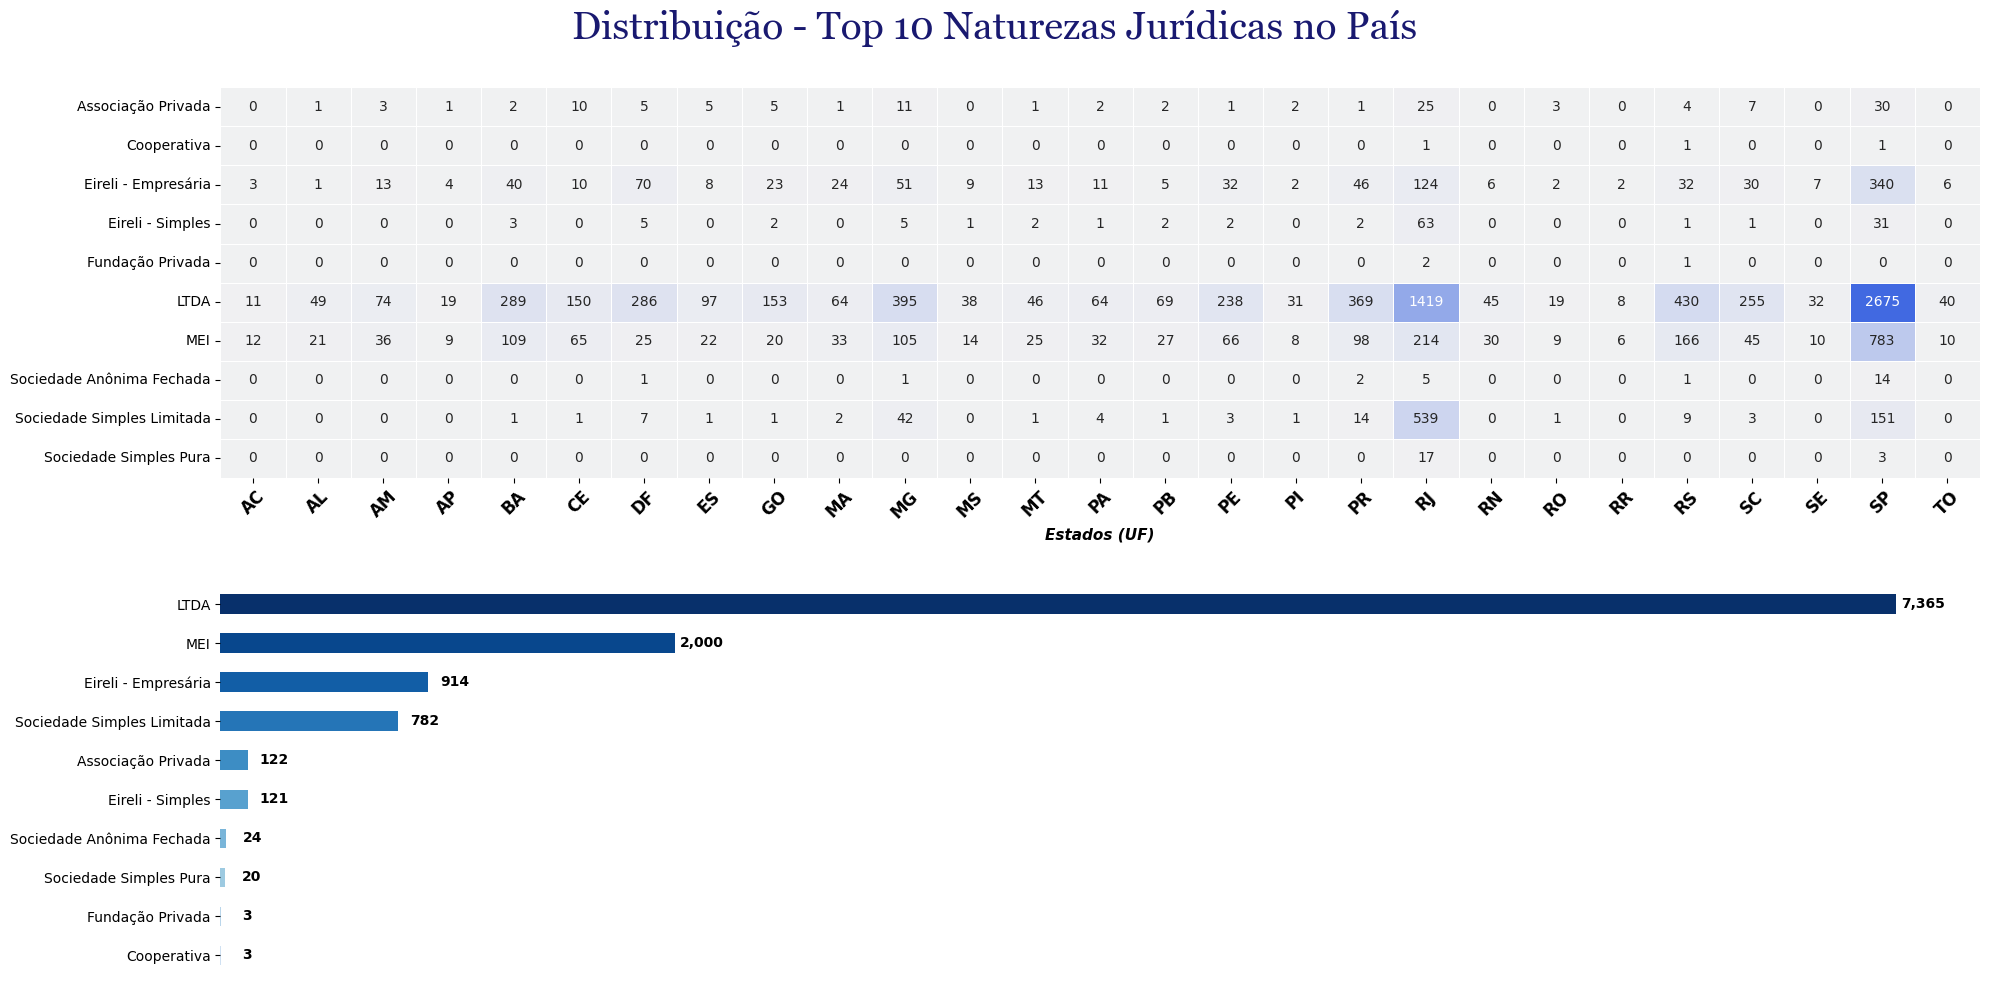

In [113]:
plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 1)
axs = [plt.subplot(gs[i]) for i in range(2)]


natureza_juridica = pd.DataFrame(agnts_tabela_unificada)
natureza_juridica['NATUREZA_JURIDICA'] = natureza_juridica['NATUREZA_JURIDICA'].replace({
    'Sociedade Empresária Limitada': 'LTDA',
    'Empresário (Individual)': 'MEI',
    'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)': 'Eireli - Empresária',
    'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)': 'Eireli - Simples'
})
ranking_natureza_juridica_top_10 = natureza_juridica['NATUREZA_JURIDICA'].value_counts().head(10)

cores = plt.cm.Blues(np.linspace(0.2, 1, len(ranking_natureza_juridica_top_10)))
ranking_natureza_juridica_top_10.sort_values(ascending=True).plot(kind='barh', color=cores, ax=axs[1])

for n in axs[1].patches:
    axs[1].annotate(format(n.get_width(), ',.0f'),
                    (n.get_width(), n.get_y() + n.get_height() / 2.),
                    ha='center', va='center',
                    xytext=(19, 0),
                    textcoords='offset points',
                    fontsize=10, fontweight='bold')

axs[1].set_title('   ', fontsize=17, fontweight='medium')
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontweight='medium')
axs[1].set_xticks([])
# axs[0].box(False)
# axs[0].set_yticks(fontweight='bold')
# axs[0].tight_layout()


pivot_table = pd.crosstab(natureza_juridica['NATUREZA_JURIDICA'], natureza_juridica['UF'])
cor = sns.color_palette("light:royalblue", as_cmap=True)
axs[0] = sns.heatmap(pivot_table, annot=True, fmt='d', linewidths=0.5, cmap=cor, ax=axs[0], cbar=False)
axs[0].set_xlabel('Estados (UF)', fontweight='bold', fontsize=11, fontstyle='oblique')
axs[0].set_ylabel(None)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontweight='medium', rotation=0)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontweight='bold', fontsize=12, rotation=45)
axs[0].set_title("   ", fontsize=20)

fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Georgia'}
plt.suptitle('Distribuição - Top 10 Naturezas Jurídicas no País', fontdict=fontprops, fontsize=28)
plt.subplots_adjust(top=1.87)
plt.subplots_adjust(hspace=1.5)
# plt.suptitle('Quantidade de Agentes por natureza jurídica', fontsize=14)
plt.box([])
plt.tight_layout()
plt.show()


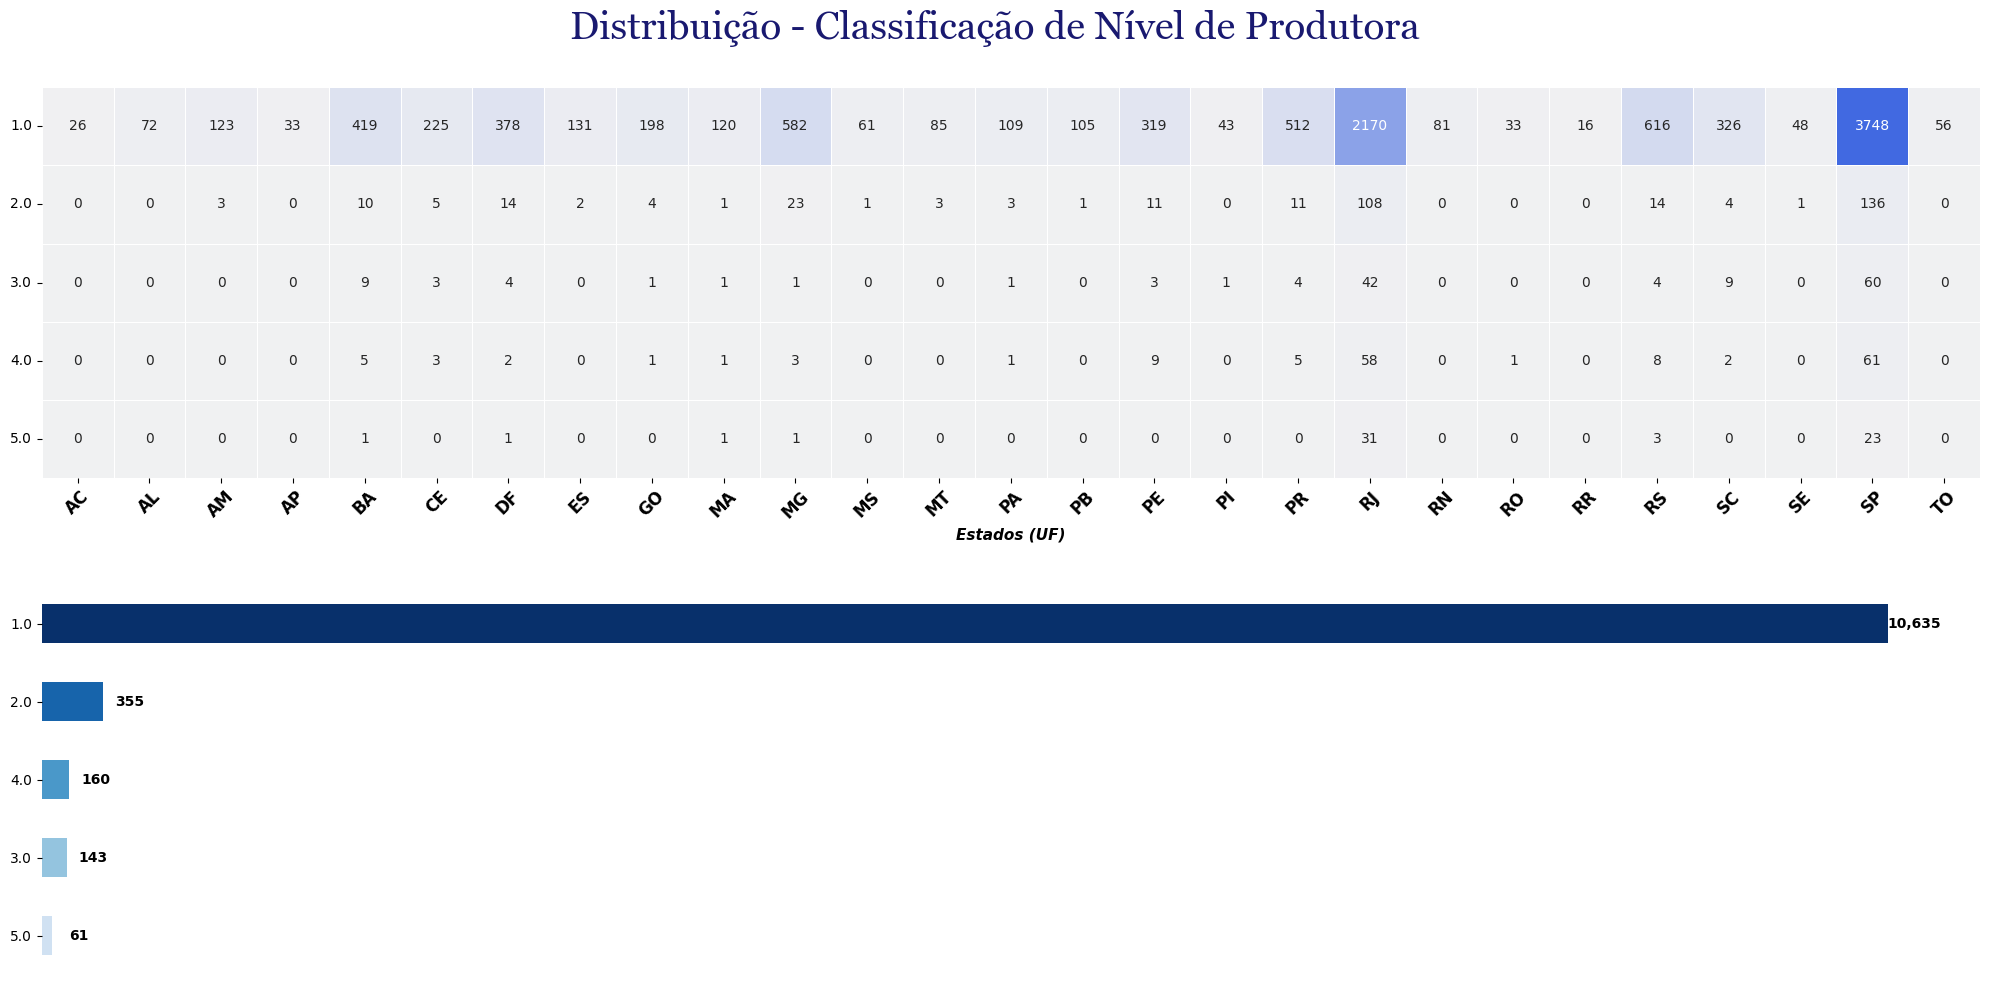

In [114]:
plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 1)
axs = [plt.subplot(gs[i]) for i in range(2)]


tabela_classificacao_produtora = pd.DataFrame(agnts_tabela_unificada[['UF', 'CLASSIFICACAO_NIVEL_PRODUTORA']])

tabela_classificacao_produtora_top = tabela_classificacao_produtora['CLASSIFICACAO_NIVEL_PRODUTORA'].value_counts().head(5)

cores = plt.cm.Blues(np.linspace(0.2, 1, len(tabela_classificacao_produtora_top)))
tabela_classificacao_produtora_top.sort_values(ascending=True).plot(kind='barh', color=cores, ax=axs[1])

for n in axs[1].patches:
    axs[1].annotate(format(n.get_width(), ',.0f'),
                    (n.get_width(), n.get_y() + n.get_height() / 2.),
                    ha='center', va='center',
                    xytext=(19, 0),
                    textcoords='offset points',
                    fontsize=10, fontweight='bold')

axs[1].set_title('   ', fontsize=17, fontweight='medium')
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontweight='medium')
axs[1].set_xticks([])


pivot_table = pd.crosstab(tabela_classificacao_produtora['CLASSIFICACAO_NIVEL_PRODUTORA'], tabela_classificacao_produtora['UF'])
cor = sns.color_palette("light:royalblue", as_cmap=True)
axs[0] = sns.heatmap(pivot_table, annot=True, fmt='d', linewidths=0.5, cmap=cor, ax=axs[0], cbar=False)
axs[0].set_xlabel('Estados (UF)', fontweight='bold', fontsize=11, fontstyle='oblique')
axs[0].set_ylabel(None)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontweight='medium', rotation=0)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontweight='bold', fontsize=12, rotation=45)
axs[0].set_title("   ", fontsize=20)

fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Georgia'}
plt.suptitle('Distribuição - Classificação de Nível de Produtora', fontdict=fontprops, fontsize=28)
plt.subplots_adjust(top=1.87)
plt.subplots_adjust(hspace=1.5)

plt.box([])
plt.tight_layout()
plt.show()


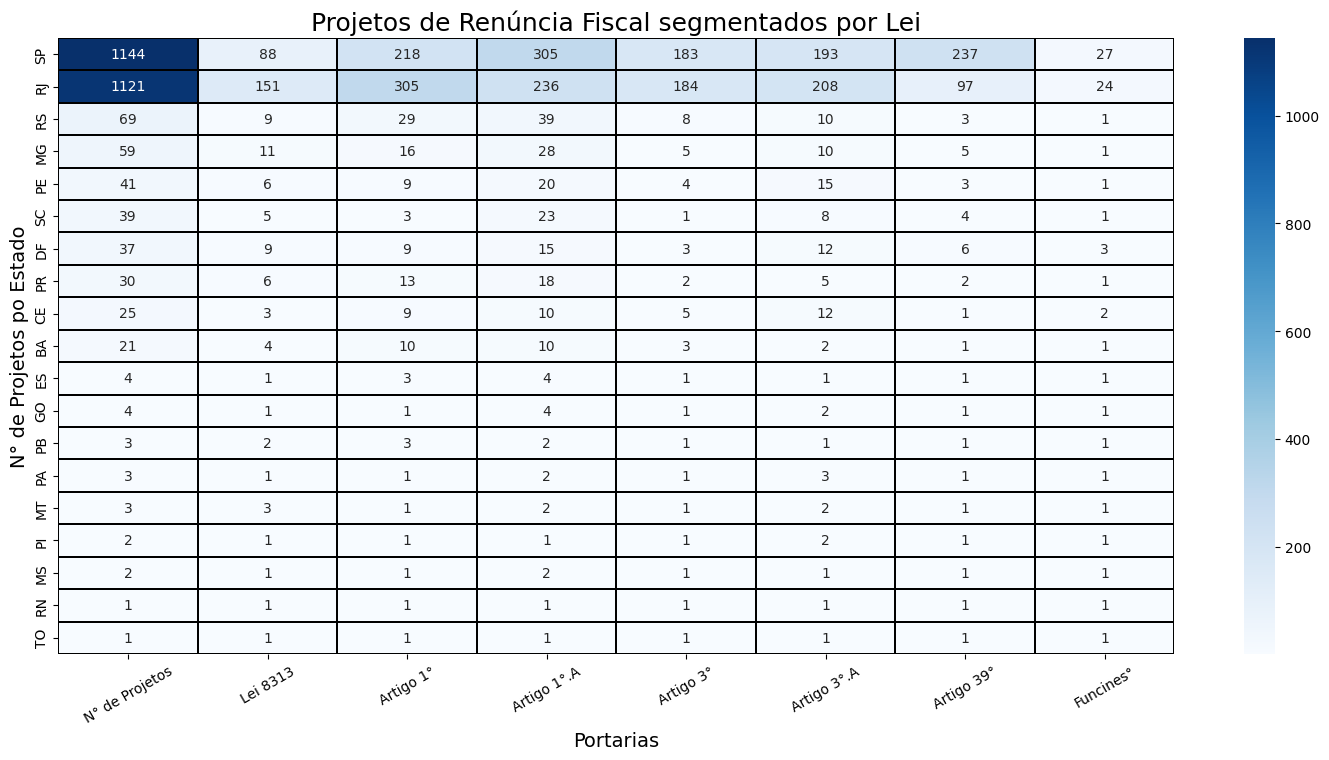

In [115]:
# df_teste_groupby_2 = produtoras_proj_renun_fiscal[(produtoras_proj_renun_fiscal['UF'] != 'SP') & (produtoras_proj_renun_fiscal['UF'] != 'RJ')].copy()
df_teste_groupby_2 = produtoras_proj_renun_fiscal.copy()

df_teste_groupby_2 = df_teste_groupby_2[['UF',
       'TITULO_PROJETO', 'LEI_8313', 'ART1', 'ART1A', 'ART3', 'ART3A', 'ART39',
       'FUNCINES']]
teste_groupby_2 = df_teste_groupby_2.groupby('UF').nunique().sort_values(by='TITULO_PROJETO', ascending=False)

legenda = {
    'TITULO_PROJETO' : 'N° de Projetos',
    'LEI_8313' : 'Lei 8313',
    'ART1' : 'Artigo 1°',
    'ART1A' : 'Artigo 1°.A',
    'ART3' : 'Artigo 3°',
    'ART3A' : 'Artigo 3°.A',
    'ART39' : 'Artigo 39°',
    'FUNCINES' : 'Funcines°',
}

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(
    teste_groupby_2, 
    annot=True,
    fmt = '.0f',  # Mostrar os valores das células
    cmap='Blues',  # Escolher uma paleta de cores
    linewidths=.005,  # Ajustar a largura das linhas entre células
    linecolor='black'  # Cor das linhas entre células
)

colunas = list(teste_groupby_2.columns)
labels_personalizados = [legenda.get(col, col) for col in colunas]

heatmap.set_xticklabels(labels_personalizados, rotation=30)

# Adicionar título e rótulos aos eixos
heatmap.set_title('Projetos de Renúncia Fiscal segmentados por Lei', fontsize=18)
heatmap.set_xlabel('Portarias', fontsize=14)
heatmap.set_ylabel('N° de Projetos po Estado', fontsize=14)

plt.show()

---

##### 3.4 Séries Temporais

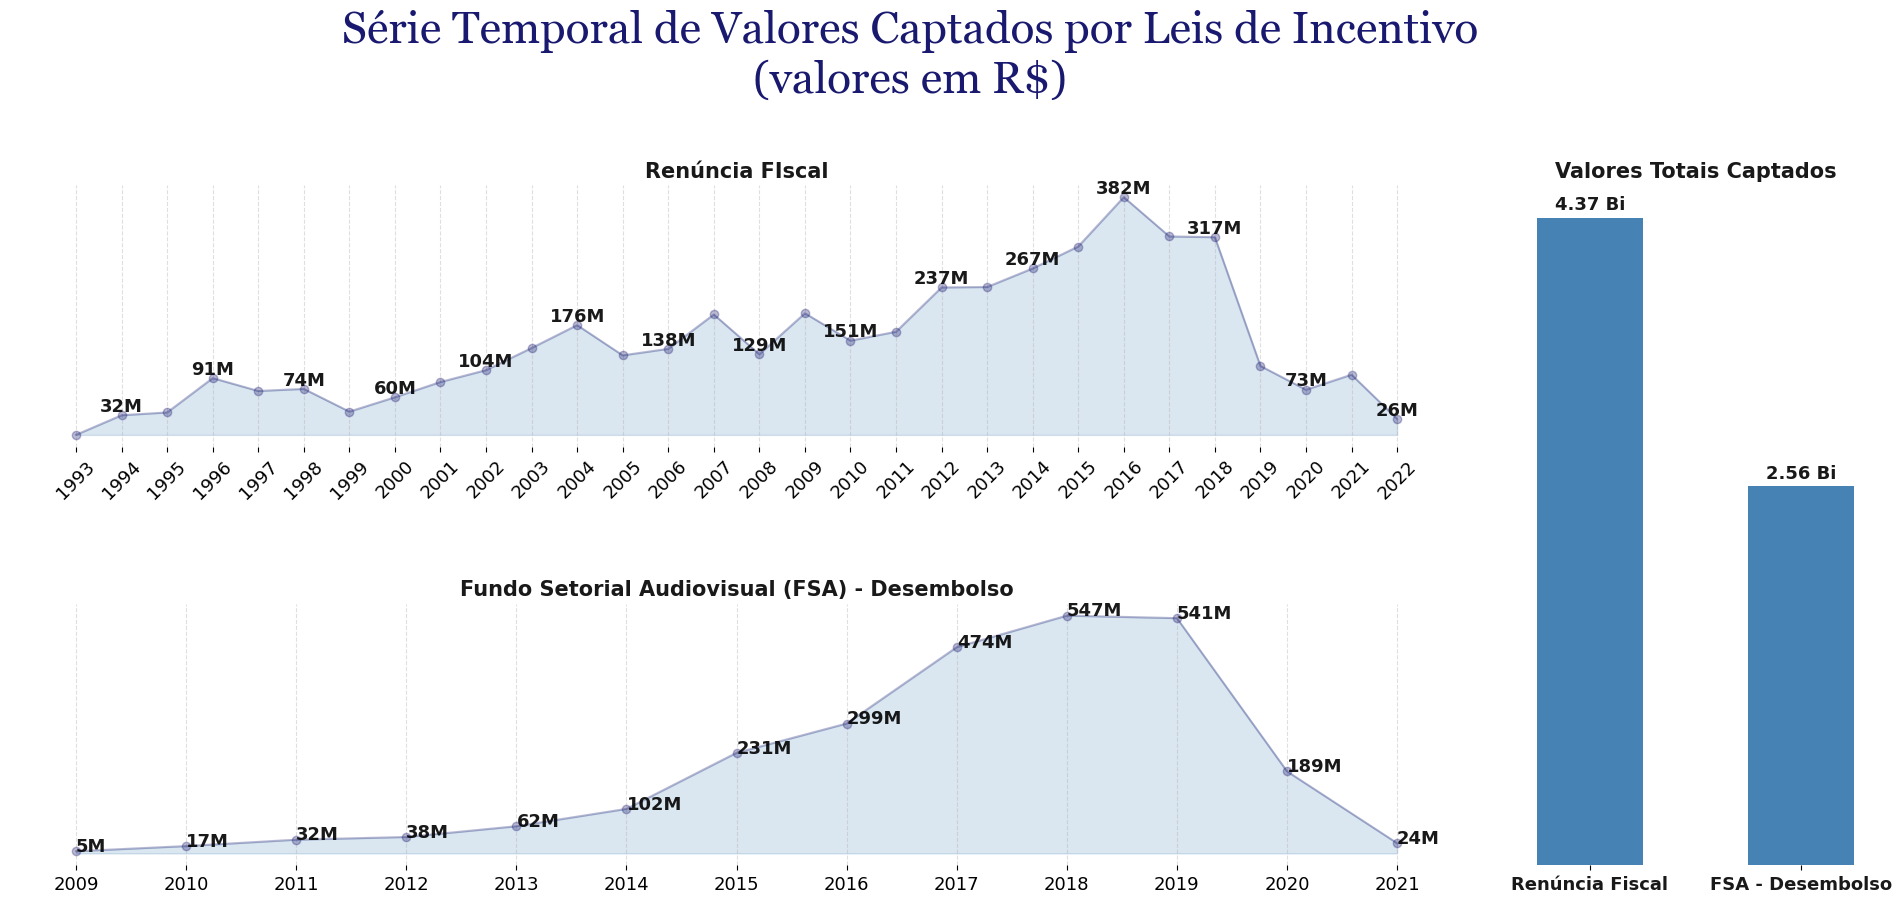

In [116]:
df_serie_temp_renun_fiscal = proj_renuncia_fiscal[['DT_APROVACAO_CAPTACAO', 'TOTAL_CAPTADO']]
df_serie_temp_renun_fiscal['TOTAL_CAPTADO'] = df_serie_temp_renun_fiscal['TOTAL_CAPTADO'].str.replace(',', '.').astype(float)
df_serie_temp_renun_fiscal['DT_APROVACAO_CAPTACAO'] = df_serie_temp_renun_fiscal['DT_APROVACAO_CAPTACAO'].dt.year
df_serie_temp_renun_fiscal = df_serie_temp_renun_fiscal.set_index('DT_APROVACAO_CAPTACAO')['TOTAL_CAPTADO']
df_serie_temp_renun_fiscal = df_serie_temp_renun_fiscal.groupby(df_serie_temp_renun_fiscal.index).sum().reset_index()
df_serie_temp_renun_fiscal_ano = df_serie_temp_renun_fiscal.set_index('DT_APROVACAO_CAPTACAO')['TOTAL_CAPTADO']

df_serie_temp_fsa_desembolso = proj_fsa_desembolso[['DT_PRIMEIRO_DESEMBOLSO', 'VL_TOTAL_LIBERADO']]
df_serie_temp_fsa_desembolso['VL_TOTAL_LIBERADO'] = df_serie_temp_fsa_desembolso['VL_TOTAL_LIBERADO'].str.replace(',', '.').astype(float)
df_serie_temp_fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'] = pd.to_datetime(df_serie_temp_fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'], errors='coerce')
df_serie_temp_fsa_desembolso = df_serie_temp_fsa_desembolso.dropna(subset=['DT_PRIMEIRO_DESEMBOLSO'])
df_serie_temp_fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'] = df_serie_temp_fsa_desembolso['DT_PRIMEIRO_DESEMBOLSO'].dt.year.astype(int)
df_serie_temp_fsa_desembolso = df_serie_temp_fsa_desembolso.set_index('DT_PRIMEIRO_DESEMBOLSO')['VL_TOTAL_LIBERADO']
df_serie_temp_fsa_desembolso = df_serie_temp_fsa_desembolso.groupby(df_serie_temp_fsa_desembolso.index).sum().reset_index()
df_serie_temp_fsa_desembolso_ano = df_serie_temp_fsa_desembolso.set_index('DT_PRIMEIRO_DESEMBOLSO')['VL_TOTAL_LIBERADO']

total_fsa_desembolso = df_serie_temp_fsa_desembolso_ano.sum()
total_renun_fiscal = df_serie_temp_renun_fiscal_ano.sum()

def grafico_fsa_renuncia_fiscal():

    #
    fig = plt.figure(figsize=(24,8))
    axs = [None for _ in range(3)]
    gs = gridspec.GridSpec(2, 3, width_ratios=[3, 1, 1])
    axs[0] = fig.add_subplot(gs[0, :-1])
    axs[1] = fig.add_subplot(gs[1, :-1])
    axs[2] = fig.add_subplot(gs[0:, -1])



    def valor_index(df, numero):
        count = 0
        for index, valor in df.items():
            milhoes = valor / 1e6
            
            if numero == 0:
                count += 1 
                if count % 2 == 0:
                    axs[0].text(index, valor, f"{milhoes:.0f}M", ha='center', va='bottom', fontweight='bold', fontsize=13, color='k', alpha=0.9)
                else:
                    continue
            else:
                axs[1].text(index, valor, f"{milhoes:.0f}M", fontweight='bold', fontsize=13, color='k', alpha=0.9)

    valor_index(df_serie_temp_fsa_desembolso_ano, 1)
    valor_index(df_serie_temp_renun_fiscal_ano, 0)

    axs[0].plot(df_serie_temp_renun_fiscal_ano.index, df_serie_temp_renun_fiscal_ano.values, color='midnightblue', marker='o', alpha=0.3, label='Serie Temp Renun Fiscal Ano')
    axs[0].set_xticks(df_serie_temp_renun_fiscal_ano.index)
    axs[0].set_xticklabels(df_serie_temp_renun_fiscal_ano.index, rotation=45, fontweight='light', alpha=1)
    axs[0].fill_between(df_serie_temp_renun_fiscal_ano.index, df_serie_temp_renun_fiscal_ano.values, color="steelblue", alpha=0.2)
    axs[0].tick_params(axis='x', which='minor', width=5)
    axs[0].set_yticks([])
    axs[0].grid(linestyle='dashed', alpha=0.4)
    axs[0].set_title('Renúncia FIscal', fontsize=15, fontweight='bold', alpha=0.9 )

    axs[1].plot(df_serie_temp_fsa_desembolso_ano.index, df_serie_temp_fsa_desembolso_ano.values, color='midnightblue', marker='o', alpha=0.3, label='Serie Temp Fsa Desembolso Ano')      
    axs[1].set_xticks(df_serie_temp_fsa_desembolso_ano.index)
    axs[1].set_xticklabels(df_serie_temp_fsa_desembolso_ano.index, rotation=0, fontweight='light', alpha=1)
    axs[1].fill_between(df_serie_temp_fsa_desembolso_ano.index, df_serie_temp_fsa_desembolso_ano.values, color="steelblue", alpha=0.2)
    axs[1].tick_params(axis='x', which='minor', width=5)
    axs[1].set_yticks([])
    axs[1].grid(linestyle='dashed', alpha=0.4)
    axs[1].set_title('Fundo Setorial Audiovisual (FSA) - Desembolso', fontsize=15, fontweight='bold', alpha=0.9 )


    # Plotting for axs[2]

    axs[2].bar(['Renúncia Fiscal', 'FSA - Desembolso'], [total_renun_fiscal, total_fsa_desembolso], width=0.5, color='steelblue')
    for rect in axs[2].patches:
        height = rect.get_height()
        value_in_billions = height / 1e9  # Convert value to billions
        rounded_value = round(value_in_billions, 2)  # Round to one decimal place
        annot_text = f'{rounded_value:,.2f} Bi'
        axs[2].annotate(annot_text, xy=(rect.get_x() + rect.get_width() / 2  , height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold', fontsize=13, alpha=0.9)
    axs[2].set_xticklabels(['Renúncia Fiscal', 'FSA - Desembolso'], rotation=0, fontweight='bold', alpha=0.9) 
    axs[2].set_title('Valores Totais Captados', fontsize=15, fontweight='bold', alpha=0.9)
    # Set tick parameters and labels
    for ax_single in axs:
        ax_single.tick_params(axis='both', which='major', labelsize=13) 
        ax_single.set_ylabel(None)  
        ax_single.set_yticks([])

    # Remove spines
    for ax_single in axs:
        ax_single.spines['top'].set_visible(False)
        ax_single.spines['right'].set_visible(False)
        ax_single.spines['bottom'].set_visible(False)
        ax_single.spines['left'].set_visible(False)

    # Adjust the spacing around subplots
    plt.subplots_adjust(top=0.95, bottom=0.1, wspace=0.1, hspace=0.6)

    # Add title
    fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Georgia'}
    plt.suptitle('Série Temporal de Valores Captados por Leis de Incentivo\n(valores em R$)', fontdict=fontprops, fontsize=32, y=1.17)
    # Show the plot
    plt.show()

grafico_fsa_renuncia_fiscal()

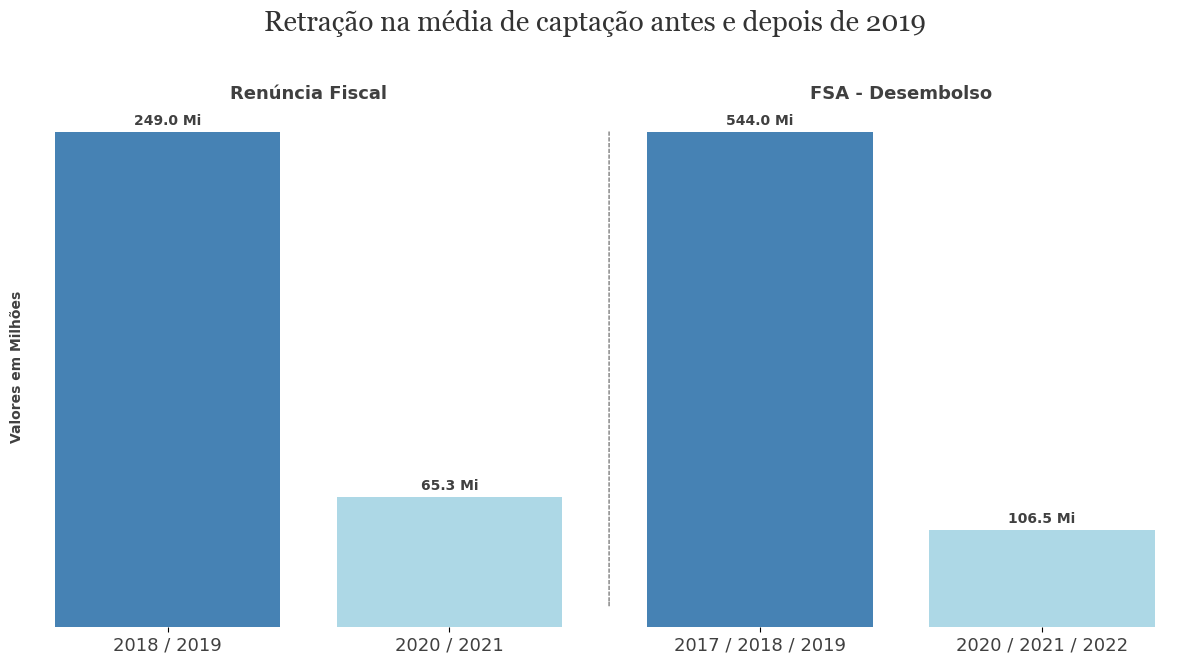

In [117]:
def retracao_media_antes_e_depois_2019(): 
   # Dados
    total_renun_fiscal_balanco = {
        'pre_2019': 249,
        'pos_2019': 65.3
    }

    total_fsa_desembolso_balanco = {
        'pre_2019': 544,
        'pos_2019': 106.5
    }

    # Preparando os dados para os gráficos
    categories_1 = ['2018 / 2019', '2020 / 2021']
    categories_2 = ['2017 / 2018 / 2019', '2020 / 2021 / 2022']
    renuncia_fiscal = [total_renun_fiscal_balanco['pre_2019'], total_renun_fiscal_balanco['pos_2019']]
    fsa_desembolso = [total_fsa_desembolso_balanco['pre_2019'], total_fsa_desembolso_balanco['pos_2019']]

    x_1 = np.arange(len(categories_1))  # Posições das categorias
    x_2 = np.arange(len(categories_2))  # Posições das categorias
    width = 0.8  # Largura das barras

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Cores para as barras
    colors_ = ['darkgreen', 'darkred']
    colors = ['steelblue', 'lightblue']

    # Gráfico de Renúncia Fiscal
    bars1 = axs[0].bar(x_1, renuncia_fiscal, width, color=colors)
    bars2 = axs[1].bar(x_2, renuncia_fiscal, width, color=colors)

    # Adicionando os valores no topo das barras
    def add_value_labels(ax, bars):
        for bar in bars:
            height = bar.get_height()
            annot_text = f'{height:,.1f} Mi'
            ax.annotate(annot_text,
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 pontos de deslocamento vertical
                        textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold', fontsize=10, alpha=0.75)

    add_value_labels(axs[0], bars1)

    # Configurações do gráfico de Renúncia Fiscal
    # axs[0].set_xlabel('Período', fontweight='bold', alpha=0.75)
    axs[0].set_ylabel('Valores em Milhões', fontweight='bold', alpha=0.75)
    axs[0].set_title('Renúncia Fiscal', fontsize=13, fontweight='bold', alpha=0.75)
    axs[0].set_xticks(x_1)
    axs[0].set_xticklabels(categories_1, rotation=0, fontweight='normal', alpha=0.75)

    # Gráfico de FSA - Desembolso
    bars2 = axs[1].bar(x_1, fsa_desembolso, width, color=colors)

    # Adicionando os valores no topo das barras
    add_value_labels(axs[1], bars2)

    # Configurações do gráfico de FSA - Desembolso
    # axs[1].set_xlabel('Período', fontweight='bold', alpha=0.75)
    axs[1].set_ylabel('-----------------------------------------------------------------------------------', fontweight='bold', alpha=0.4)
    axs[1].set_title('FSA - Desembolso', fontsize=13, fontweight='bold', alpha=0.75)
    axs[1].set_xticks(x_2)
    axs[1].set_xticklabels(categories_2, rotation=0, fontweight='normal', alpha=0.75)

    # Ajustes nas grades e eixos
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])

    # Ajustando o layout
    plt.tight_layout()

    # Adicionando título geral
    fontprops = {'color': 'black', 'weight': 'bold', 'style': 'normal', 'family': 'Georgia'}
    plt.suptitle('Retração na média de captação antes e depois de 2019', fontdict=fontprops, fontsize=20, alpha=0.8, y=1.10)

    # Mostrando o gráfico
    plt.show()

retracao_media_antes_e_depois_2019()

---

## 4. Análise Estatística

#### 4.1 Perfil estatístico

In [118]:
#Função que retorna dados estatísticos
def stats_df(df):

    numerical = df.select_dtypes(exclude=('datetime64[ns]', 'object', 'bool'))

    media = pd.DataFrame(numerical.mean()).T
    mediana = pd.DataFrame(numerical.median()).T

    desvio_padrao = pd.DataFrame(numerical.apply(np.std)).T
    minimo = pd.DataFrame(numerical.min()).T
    maximo = pd.DataFrame(numerical.max()).T
    range = pd.DataFrame(numerical.apply(lambda x: x.max() - x.min())).T
    skew = pd.DataFrame(numerical.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(numerical.apply(lambda x: x.kurtosis())).T

    nome_stats_df = 'stats_' + str(df)
    nome_stats_df = pd.concat([media, mediana, desvio_padrao, minimo, maximo, range, skew, kurtosis]).T.reset_index()

    if df is fsa_desembolso:
        nome_df = 'FSA - Desembolso'
    else:
        nome_df = 'Renúncia Fiscal'
    nome_stats_df.columns = [nome_df, 'Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Range', 'Skew', 'Kurtosis']
    return nome_stats_df


#### 4.2 Atributos Numéricos

In [119]:
#Função que retorna gráfico Histogram

fsa_desembolso_numerical = fsa_desembolso.select_dtypes(exclude=('datetime64[ns]', 'object', 'bool'))
renuncia_fiscal_numerical = renuncia_fiscal.select_dtypes(exclude=('datetime64[ns]', 'object', 'bool'))


def plot_hist_renuncia_fiscal():

    fig = plt.figure(figsize=(18,10))
    axs = [None] * 4
    gs = gridspec.GridSpec(2, 2)
    axs[0] = fig.add_subplot(gs[0,0])
    axs[1] = fig.add_subplot(gs[0,1])
    axs[2] = fig.add_subplot(gs[1,0])
    axs[3] = fig.add_subplot(gs[1,1])

    n_bins = 40

    labels = {
        'CLASSIFICACAO_NIVEL_PRODUTORA' : 'Nível de Classificação',
        'ANO_CHAMADA_PUBLICA' : 'Ano da Chamada Pública',
        'VL_CONTRATO_DOU' : 'Valor do Contrato',
        'VL_TOTAL_LIBERADO' : 'Valor Liberado',
    }

    #Plot Hist - Renúncia Fiscal
    for i, column in enumerate(['CLASSIFICACAO_NIVEL_PRODUTORA', 'ANO_CHAMADA_PUBLICA', 'VL_CONTRATO_DOU', 'VL_TOTAL_LIBERADO']):
        sns.histplot(fsa_desembolso_numerical[column], bins=n_bins, kde=True, ax=axs[i], 
                     stat='percent', line_kws={'color': 'red'})
        axs[i].set_title(labels[column])
        axs[i].set_xlabel(None)


    plt.tight_layout()
    plt.show()

def plot_hist_fsa_desembolso():
    
    fig = plt.figure(figsize=(16,12))
    axs = [None] * 8
    gs = gridspec.GridSpec(4, 3)
    axs[0] = fig.add_subplot(gs[0,0])
    axs[1] = fig.add_subplot(gs[0,1])
    axs[2] = fig.add_subplot(gs[1,0])
    axs[3] = fig.add_subplot(gs[1,1])
    axs[4] = fig.add_subplot(gs[2,0])
    axs[5] = fig.add_subplot(gs[2,1])
    axs[6] = fig.add_subplot(gs[3,0])
    axs[7] = fig.add_subplot(gs[3,1])

    n_bins = 40

    labels = {
        'LEI_8313' : 'Lei 8313 (Lei Rouanet)',
        'ART1' : 'Artigo 1°',
        'ART1A' : 'Artigo 1°.A',
        'ART3' : 'Artigo 3°',
        'ART3A' : 'Artigo 3°.A',
        'ART39' : 'Artigo 39°',
        'FUNCINES' : 'FUNCINES - Fundo Municipal de Cinema',
        'TOTAL_CAPTADO' : 'Total Captado',
    }
    #Plot Hist - FSA - Desembolso
    for i, column in enumerate(['LEI_8313', 'ART1',
        'ART1A', 'ART3', 'ART3A', 'ART39', 'FUNCINES', 'TOTAL_CAPTADO']):
        sns.histplot(renuncia_fiscal_numerical[column], bins=n_bins, kde=True, ax=axs[i], stat='percent')
        axs[i].set_title(labels[column])
        axs[i].set_xlabel(None)
    # plt.box([])
    plt.tight_layout()
    plt.show()

#### 4.3 Atributos Categóricos

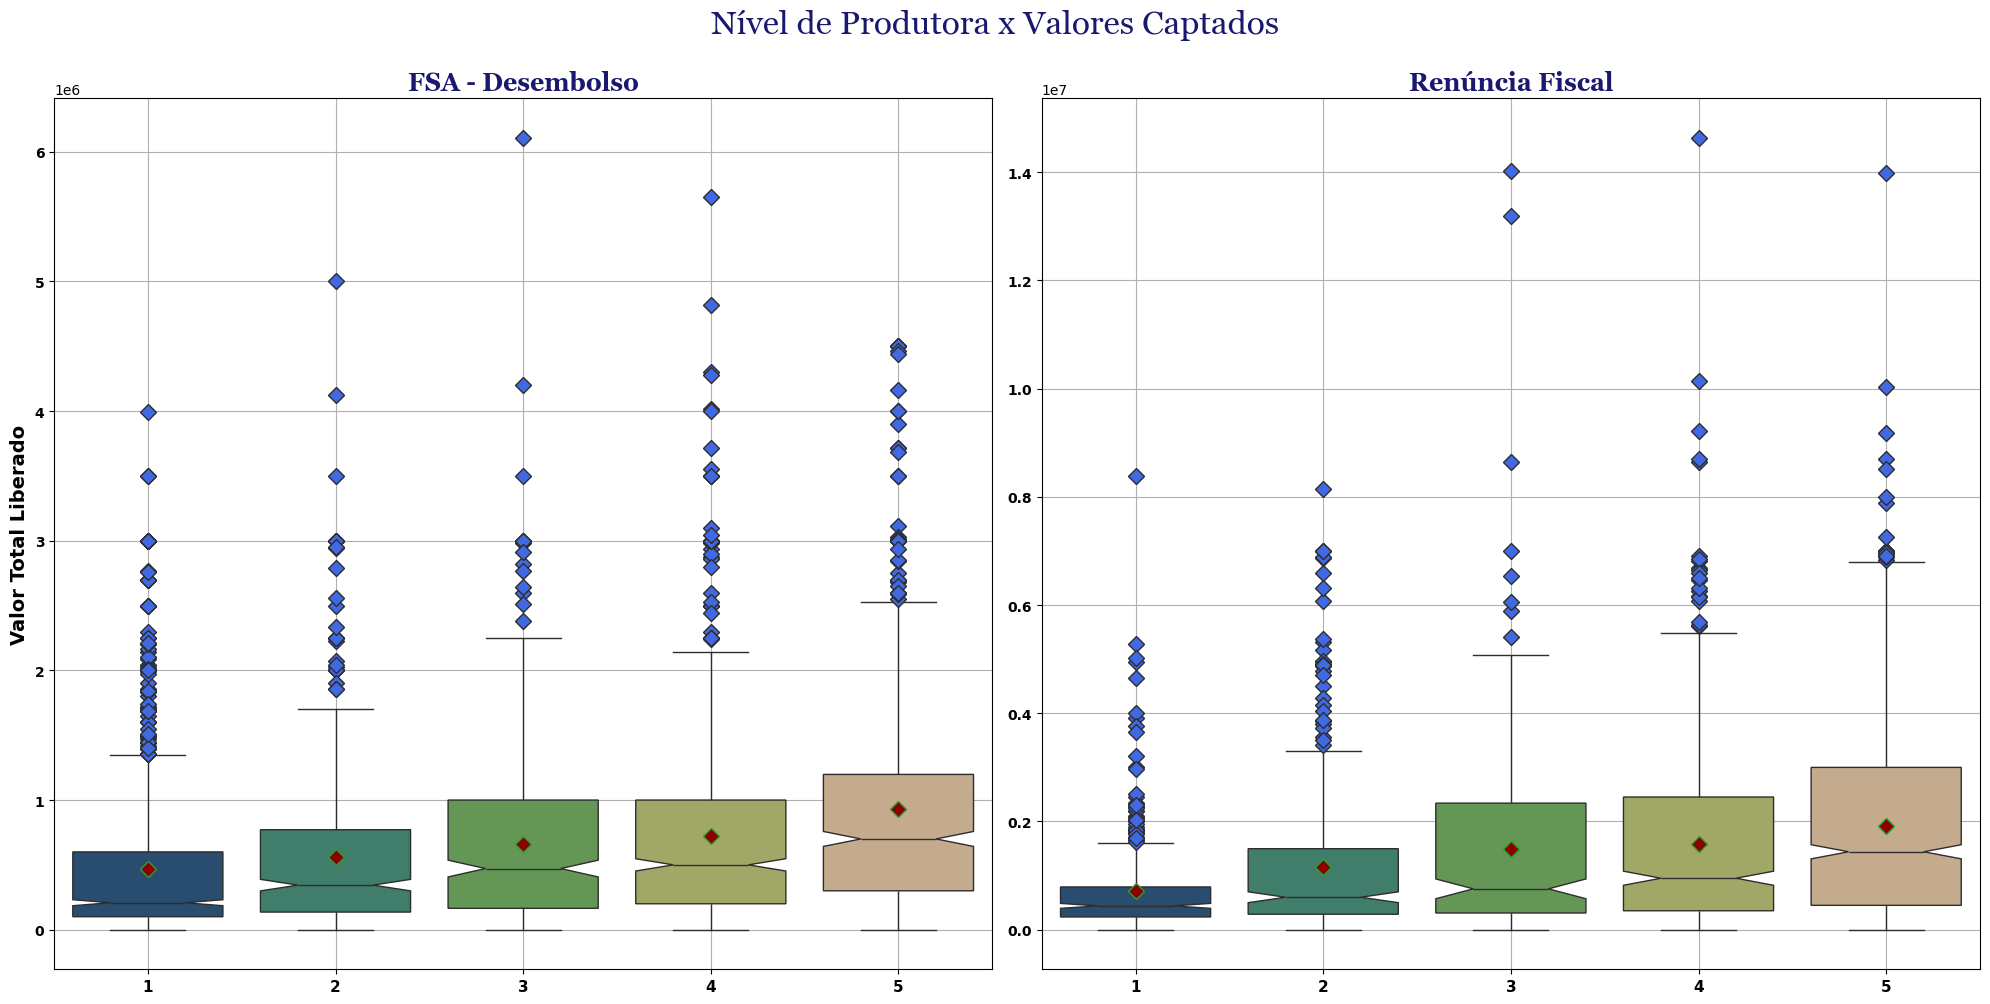

In [120]:
#Boxplot - Atributos Categóricos
data_fsa = fsa_desembolso
data_renuncia = renuncia_fiscal

fig = plt.figure(figsize=(20,10))
axs = [None] * 2
gs = gridspec.GridSpec(1, 2)
axs[0] = fig.add_subplot(gs[0,0])
axs[1] = fig.add_subplot(gs[0,1])

fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Georgia'}
flierprops = dict(marker='D', markerfacecolor='royalblue', markersize=8, linestyle='none')
meanprops = dict(marker='D', markerfacecolor='darkred', markersize=8)

axs[0] = plt.subplot(1, 2, 1)
sns.boxplot(x='CLASSIFICACAO_NIVEL_PRODUTORA', y='VL_TOTAL_LIBERADO', data=data_fsa, 
            notch=True, showmeans=True, meanprops=meanprops, 
            palette='gist_earth', flierprops=flierprops)
axs[0] = plt.xticks(fontweight='bold', fontsize=11)
axs[0] = plt.ylabel('Valor Total Liberado', fontweight='bold', fontsize=14)
axs[0] = plt.title('FSA - Desembolso', fontdict=fontprops, fontsize=18)
# axs[0] = plt.box(None)
axs[0] = plt.grid(None)
axs[0] = plt.yticks(fontsize=10, fontweight='bold')
axs[0] = plt.xlabel(None)

axs[1] =  plt.subplot(1, 2, 2)
sns.boxplot(x='CLASSIFICACAO_NIVEL_PRODUTORA', y='TOTAL_CAPTADO', data=data_renuncia, 
            notch=True, showmeans=True, meanprops=meanprops,
              palette='gist_earth', flierprops=flierprops)
axs[1] = plt.xticks(fontweight='bold', fontsize=11)
axs[1] = plt.ylabel(None)
axs[1] = plt.title('Renúncia Fiscal', fontdict=fontprops, fontsize=18)
# axs[1] = plt.box(None)
axs[1] = plt.grid(None)
axs[1] = plt.yticks(fontsize=10, fontweight='bold')
axs[1] = plt.xlabel(None)

plt.suptitle('Nível de Produtora x Valores Captados', fontdict=fontprops, fontsize=24, y=1.0)
plt.tight_layout()
plt.show()

## 5. Feature Engineering

#### 5.1 Normalizar/Padronizar/Codificar Variáveis/Outliers/Criar features

##### FSA / Desembolso  
    * Criar Coluna com a soma de dias passados entre a data de aprovação e a data do primerio desembolso
    * Padronizar coluna CHAMADA_PUBLICA
    * Criar coluna numérica da CHAMADA_PUBLICA e NATUREZA_JURIDICA
    * Remoção dos 5% de valores extremos, retendo 95% dos dados


In [121]:
fsa_ml_padrao = fsa_desembolso.copy()
fsa_ml_padrao = fsa_desembolso[['REGISTRO_ANCINE', 'RAZAO_SOCIAL', 'UF', 'TITULO_PROJETO', 'NATUREZA_JURIDICA','CHAMADA_PUBLICA','DT_PUBLICACAO_CONTRATO_DOU', 'VL_CONTRATO_DOU', 'DT_PRIMEIRO_DESEMBOLSO', 'VL_TOTAL_LIBERADO']]

fsa_ml_padrao['TEMPO_DESEMBOLSO'] = np.array(fsa_ml_padrao['DT_PRIMEIRO_DESEMBOLSO'] - fsa_ml_padrao['DT_PUBLICACAO_CONTRATO_DOU'])

fsa_ml_padrao = fsa_ml_padrao[
    fsa_ml_padrao['TEMPO_DESEMBOLSO'] > pd.Timedelta(0)
]

fsa_ml_padrao['TEMPO_DESEMBOLSO'] = fsa_ml_padrao['TEMPO_DESEMBOLSO'].dt.days
fsa_ml_padrao['TEMPO_DESEMBOLSO'] = np.array(fsa_ml_padrao['TEMPO_DESEMBOLSO'])
fsa_ml_padrao.sort_values(by='TEMPO_DESEMBOLSO', ascending=False)

#Transformar variavel CHAMADA_PUBLICA em numeral
chamadas = {
'COMERCIALIZAÇÃO EM CINEMA' : 'Comercialização',
 'PRODECINE 01' : 'PRODECINE',
 'PRODECINE 04' : 'PRODECINE',
 'PRODAV 05' : 'PRODAV',
 'CRÉDITO EMERGENCIAL FSA' : 'Crédito Emergencial',
 'PRODAV 03' : 'PRODAV',
 'PRODAV 01' : 'PRODAV',
 'ARRANJOS REGIONAIS' : 'Arranjos Regionais',
 'PRODAV 06' : 'PRODAV',
 'PRODAV 02 - PROJETO DERIVADO' : 'PRODAV',
 'PRODAV 11' : 'PRODAV',
 'PRODAV 13' : 'PRODAV',
 'SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL TV E VOD' : 'Suporte Automático',
 'COPRODUÇÃO INTERNACIONAL': 'Coprodução Internacional',
 'PRODECINE 02' : 'PRODECINE',
 'PRODECINE 05' : 'PRODECINE',
 'PRODECINE 03' : 'PRODECINE',
 'PRODAV 10' : 'PRODAV',
 'FLUXO CONTÍNUO PRODUÇÃO PARA CINEMA' : 'Fluxo Contínuo',
 'SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA' : 'Suporte Automático',
 'CONCURSO PRODUÇÃO PARA CINEMA' : 'Concurso',
 'SAV/MINC 11' : 'SAV/MINC',
 'PRODAV 07' : 'PRODAV',
 'SAV/MINC 09' : 'SAV/MINC',
 'SAV/MINC 04' : 'SAV/MINC',
 'PRODAV 09' : 'PRODAV',
 'SAV/MINC 10' : 'SAV/MINC',
 'PRODAV 12' : 'PRODAV',
 'PRODAV 04' : 'PRODAV',
 'PRODAV 07/SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA' : 'PRODAV',
 'PRODAV 06/SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA' : 'PRODAV',
 'PRODECINE 06' : 'PRODECINE',
 'PRODECINE 12' : 'PRODECINE',
 'SUPORTE AUTOMÁTICO - DESEMPENHO ARTÍSTICO' : 'Suporte Automático',
 'SAV/MINC 13' : 'SAV/MINC',
 'FLUXO CONTÍNUO PRODUÇÃO PARA TELEVISÃO' :'Fluxo Contínuo',
 'PRODECINE 08' : 'PRODECINE',
 'PRODAV 06/PRODAV 07' : 'PRODAV',
 'SAV/MINC 03' : 'SAV/MINC',
 'SAV/MINC 01' : 'SAV/MINC',
 'PRODAV - TVS PÚBLICAS' : 'PRODAV',
 'SAV/MINC 02' : 'SAV/MINC',
 'SAV/MINC 08' : 'SAV/MINC',
 'PRODECINE 07' : 'PRODECINE',
 'PRODAV 08' : 'PRODAV',
 'PROGRAMA ESPECIAL DE APOIO AO PEQUENO EXIBIDOR \x96 PEAPE' : 'Programa Especial',
 'SAV/MINC 05' : 'SAV/MINC',
 'PRODECINE 09' : 'PRODECINE',
 'PRODAV 14' : 'PRODAV',
 'SAV/MINC 06' : 'SAV/MINC',
 'SAV/MINC 07' : 'SAV/MINC',
 'PRODECINE 10' : 'PRODECINE'
}

fsa_ml_padrao['CHAMADA_PUBLICA'] = fsa_ml_padrao['CHAMADA_PUBLICA'].replace(chamadas)


fsa_ml_padrao['CHAMADA_PUBLICA_encoded'] = pd.factorize(fsa_ml_padrao['CHAMADA_PUBLICA'])[0]

fsa_ml_padrao['NATUREZA_JURIDICA_encoded'] = pd.factorize(fsa_ml_padrao['NATUREZA_JURIDICA'])[0]

fsa_ml_padrao['UF_encoded'] = pd.factorize(fsa_ml_padrao['UF'])[0]


In [122]:
scaler = MinMaxScaler()
fsa_ml_padrao_numerical = fsa_ml_padrao.select_dtypes(include=('float64', 'float32', 'int32', 'int64'))
scaled_data = scaler.fit_transform(fsa_ml_padrao_numerical)
df_scaled = pd.DataFrame(scaled_data, columns=fsa_ml_padrao_numerical.columns)

In [123]:
#Outliers
# Lista de UF's
ufs = ['RJ', 'SP', 'DF', 'SC', 'RS', 'BA', 'MG', 'PE', 'GO', 'CE', 'PR',
       'PB', 'MT', 'PA', 'AM', 'RN', 'AL', 'PI', 'SE', 'AP', 'ES', 'MA',
       'MS', 'TO', 'RO', 'AC', 'RR']

# Iterando sobre cada UF na lista
for uf in ufs:
    # Filtrando os dados para a UF atual
    query_uf = fsa_ml_padrao.query('UF == @uf')
    
    # Calculando o percentil de 95% para a coluna 'TEMPO_DESEMBOLSO'
    percentil_95 = np.percentile(query_uf['TEMPO_DESEMBOLSO'], 95)
    fsa_ml_padrao = fsa_ml_padrao[~((fsa_ml_padrao['UF'] == uf) & (fsa_ml_padrao['TEMPO_DESEMBOLSO'] > percentil_95))]

##### Renúncia Fiscal
    * Criar Coluna com a soma de dias passados entre a data de aprovação e a data da liberação
    * Padronizar coluna NATUREZA_JURIDICA
    * Criar coluna numérica da UF, NATUREZA_JURIDICA
    * Remoção dos 5% de valores extremos, retendo 95% dos dados

In [ ]:
re_fiscal_ml = produtoras_proj_renun_fiscal.copy()


re_fiscal_ml = re_fiscal_ml[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'CNPJ',
       'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO', 'NATUREZA_JURIDICA',
       'ATIVIDADE_ECONOMICA', 'CLASSIFICACAO_NIVEL_PRODUTORA', 'LEI_8313', 'ART1', 'ART1A', 'ART3', 'ART3A', 'ART39',
       'FUNCINES', 'TOTAL_CAPTADO', 'DT_APROVACAO_CAPTACAO', 'DT_1_LIBERACAO']]

##
re_fiscal_ml['TEMPO_DESEMBOLSO'] = np.array(re_fiscal_ml['DT_1_LIBERACAO'] - re_fiscal_ml['DT_APROVACAO_CAPTACAO'])

re_fiscal_ml = re_fiscal_ml[
    re_fiscal_ml['TEMPO_DESEMBOLSO'] > pd.Timedelta(0)
]

re_fiscal_ml['TEMPO_DESEMBOLSO'] = re_fiscal_ml['TEMPO_DESEMBOLSO'].dt.days
re_fiscal_ml['TEMPO_DESEMBOLSO'] = np.array(re_fiscal_ml['TEMPO_DESEMBOLSO'])


##
vol_valores = [
        'LEI_8313', 'ART1', 'ART1A', 'ART3',
       'ART3A', 'ART39', 'FUNCINES', 'TOTAL_CAPTADO']

for col in vol_valores:
    re_fiscal_ml[col] = re_fiscal_ml[col].str.replace(',', '.').astype(float)


##
col_factorize = ['UF', 
                 'MUNICIPIO', 
                 'NATUREZA_JURIDICA', 
                 'ATIVIDADE_ECONOMICA']


for col in col_factorize:
    col_name = col + '_encoded'
    re_fiscal_ml[col_name] = pd.factorize(re_fiscal_ml[col])[0]




In [ ]:
scaler = MinMaxScaler()
re_fiscal_ml_numerical = re_fiscal_ml.select_dtypes(include=('float64', 'float32', 'int32', 'int64'))
scaled_data = scaler.fit_transform(re_fiscal_ml_numerical)
df_scaled = pd.DataFrame(scaled_data, columns=re_fiscal_ml_numerical.columns)


In [ ]:
#Outliers
# Lista de UF's
ufs = re_fiscal_ml['UF'].unique()

# Iterando sobre cada UF na lista
for uf in ufs:
    # Filtrando os dados para a UF atual
    query_uf = re_fiscal_ml.query('UF == @uf')
    
    # Calculando o percentil de 95% para a coluna 'TEMPO_DESEMBOLSO'
    percentil_95 = np.percentile(query_uf['TEMPO_DESEMBOLSO'], 99)
    re_fiscal_ml = re_fiscal_ml[~((re_fiscal_ml['UF'] == uf) & (re_fiscal_ml['TEMPO_DESEMBOLSO'] > percentil_95))]
    


#### Gráficos descritivos

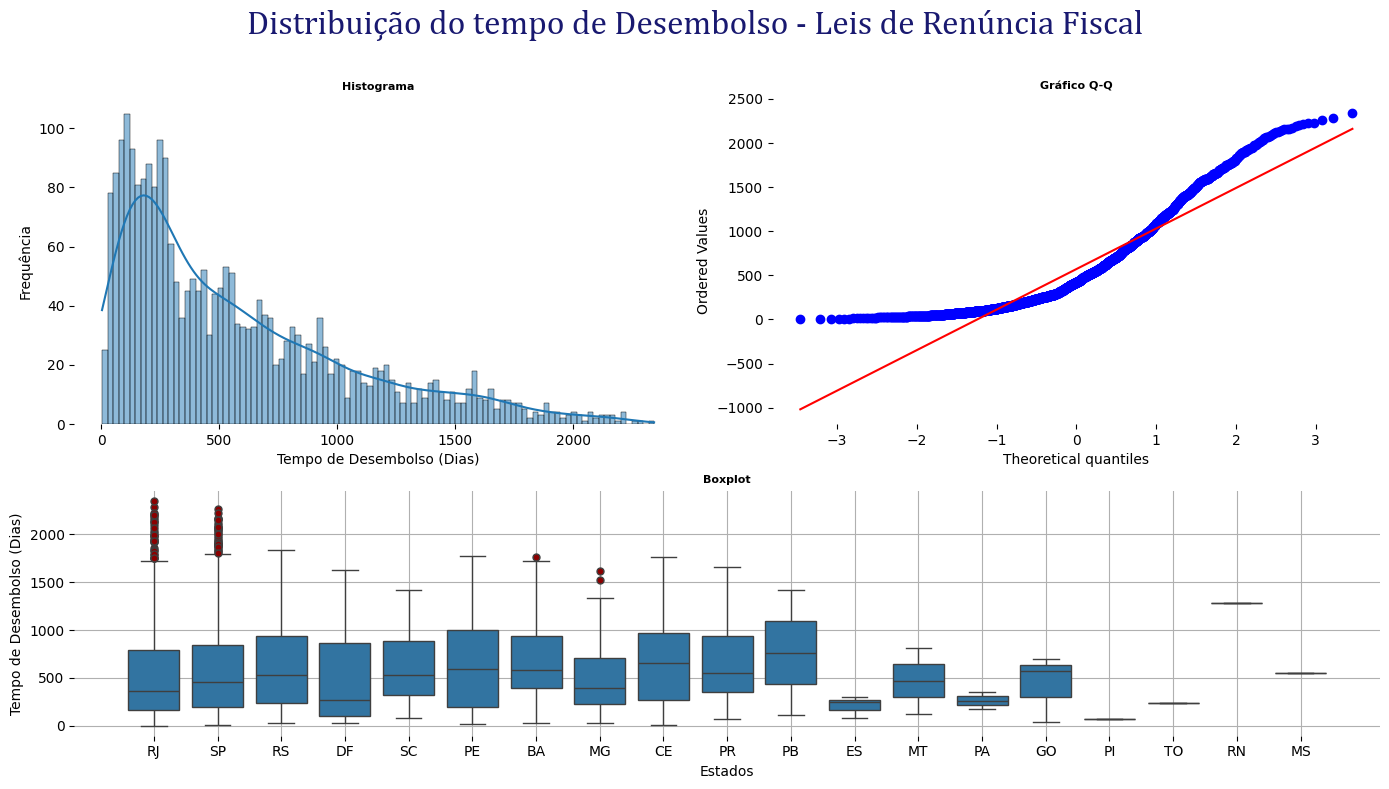

In [ ]:
# Plot com 3 plots = boxplot, histogram e gráfico q-q

# Criar a figura
plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[4, 3], width_ratios=[2, 2])
# Plotar mapa dos estados sem SP e RJ
ax1 = plt.subplot(gs[0,0])
sns.histplot(re_fiscal_ml['TEMPO_DESEMBOLSO'], bins=100, kde=True)
ax1.set_title('Histograma', fontweight='bold', fontsize=8)
ax1.set_xlabel('Tempo de Desembolso (Dias)')
ax1.set_ylabel('Frequência')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

quantile_95 = np.percentile(re_fiscal_ml['TEMPO_DESEMBOLSO'], 95)
# ax1.axvline(x=quantile_95, color='red', linestyle='--', linewidth=1, label='Quantil de 95%')

##########

# Plotar mapa dos estados com SP e RJ


ax2 = plt.subplot(gs[0,1])
stats.probplot(re_fiscal_ml['TEMPO_DESEMBOLSO'], dist="norm", plot=plt)
ax2.set_title('Gráfico Q-Q', fontweight='bold', fontsize=8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

#############

# Plotar gráfico de barras
flierprops = dict(marker='o', color='darkblue', markerfacecolor='darkred', markersize=5)


ax3 = plt.subplot(gs[1, :])
sns.boxplot(x='UF', y='TEMPO_DESEMBOLSO', data=re_fiscal_ml, ax=ax3, flierprops=flierprops)
# for p in ax3.patches:
#     ax3.annotate( 
#                    ha='center', va='center', 
#                    xytext=(0, 8), 
#                    textcoords='offset points',
#                    fontsize=9, fontweight='bold')
ax3.set_title('Boxplot', fontweight='bold', fontsize=8)
ax3.set_xlabel('Estados')
ax3.set_ylabel('Tempo de Desembolso (Dias)')
ax3.margins(0.045)
plt.tight_layout()
ax3.grid(True)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

##############

fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Cambria'}

plt.suptitle('Distribuição do tempo de Desembolso - Leis de Renúncia Fiscal', fontdict=fontprops, fontsize=24)
plt.subplots_adjust(top=0.87)
plt.show()


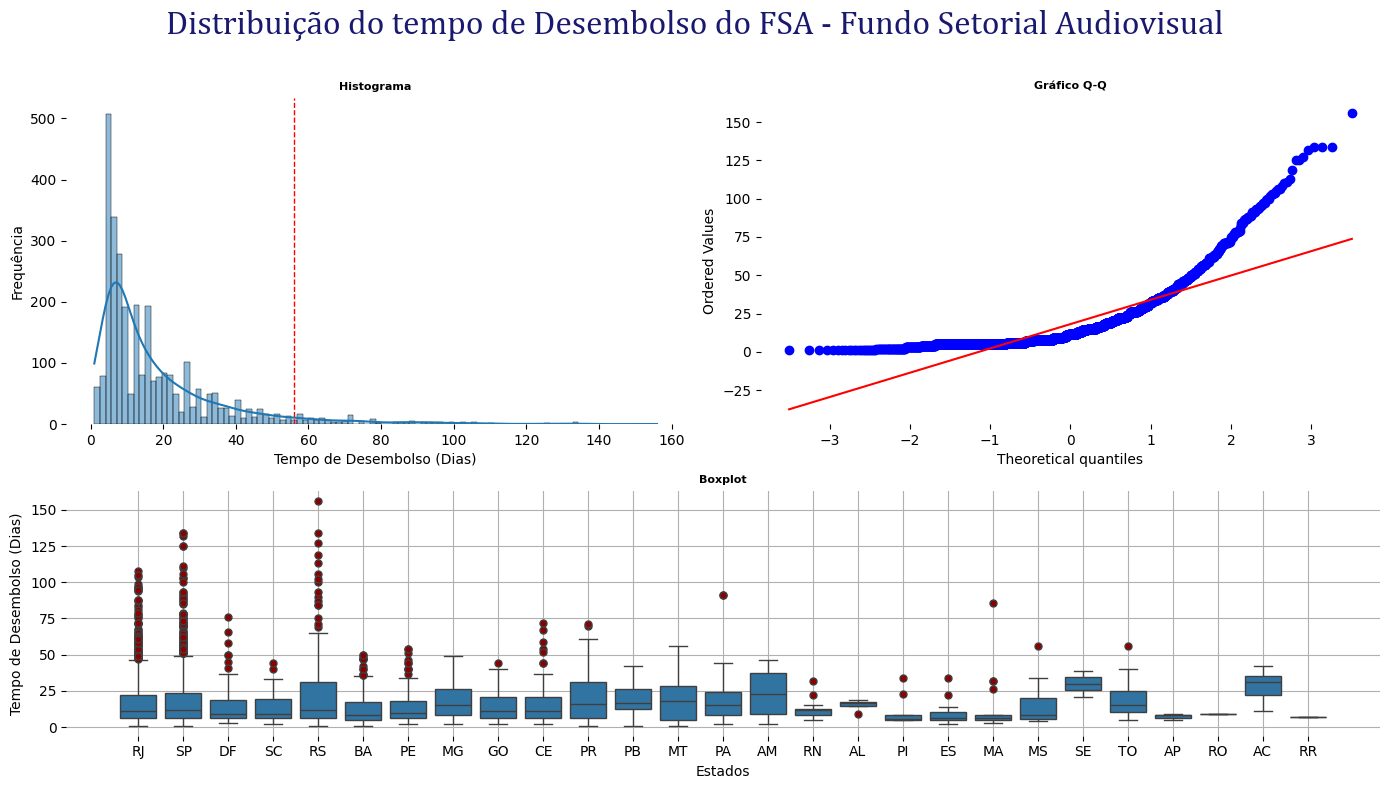

In [ ]:
# Plot com 3 plots = boxplot, histogram e gráfico q-q

# Criar a figura
plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[4, 3], width_ratios=[2, 2])
# Plotar mapa dos estados sem SP e RJ
ax1 = plt.subplot(gs[0,0])
sns.histplot(fsa_ml_padrao['TEMPO_DESEMBOLSO'], bins=100, kde=True)
ax1.set_title('Histograma', fontweight='bold', fontsize=8)
ax1.set_xlabel('Tempo de Desembolso (Dias)')
ax1.set_ylabel('Frequência')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

quantile_95 = np.percentile(fsa_ml_padrao['TEMPO_DESEMBOLSO'], 95)
ax1.axvline(x=quantile_95, color='red', linestyle='--', linewidth=1, label='Quantil de 95%')

##########

# Plotar mapa dos estados com SP e RJ


ax2 = plt.subplot(gs[0,1])
stats.probplot(fsa_ml_padrao['TEMPO_DESEMBOLSO'], dist="norm", plot=plt)
ax2.set_title('Gráfico Q-Q', fontweight='bold', fontsize=8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

#############

# Plotar gráfico de barras
flierprops = dict(marker='o', color='darkblue', markerfacecolor='darkred', markersize=5)

ax3 = plt.subplot(gs[1, :])
sns.boxplot(x='UF', y='TEMPO_DESEMBOLSO', data=fsa_ml_padrao, ax=ax3, flierprops=flierprops)
# for p in ax3.patches:
#     ax3.annotate( 
#                    ha='center', va='center', 
#                    xytext=(0, 8), 
#                    textcoords='offset points',
#                    fontsize=9, fontweight='bold')
ax3.set_title('Boxplot', fontweight='bold', fontsize=8)
ax3.set_xlabel('Estados')
ax3.set_ylabel('Tempo de Desembolso (Dias)')
ax3.margins(0.045)
plt.tight_layout()
ax3.grid(True)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

##############

fontprops = {'color': 'midnightblue', 'weight': 'bold', 'style': 'normal', 'family' : 'Cambria'}

plt.suptitle('Distribuição do tempo de Desembolso do FSA - Fundo Setorial Audiovisual', fontdict=fontprops, fontsize=24)
plt.subplots_adjust(top=0.87)
plt.show()


#### Visualização

In [ ]:
def stats_tempo_desembolso(df):
    numerical = df.select_dtypes(include=('int64', 'float64'))

    media = pd.DataFrame(numerical.mean().round().apply(lambda x: f'{x:,.2f}')).T
    mediana = pd.DataFrame(numerical.median().round().apply(lambda x: f'{x:,.2f}')).T
    moda = pd.DataFrame(numerical.mode().iloc[0]).T
    desvio_padrao = pd.DataFrame(numerical.apply(np.std).round().apply(lambda x: f'{x:,.2f}')).T
    minimo = pd.DataFrame(numerical.min()).T
    maximo = pd.DataFrame(numerical.max().apply(lambda x: f'{x:,.2f}')).T
    quantile_1 = pd.DataFrame(numerical.quantile(0.25)).T
    quantile_2 = pd.DataFrame(numerical.quantile(0.50)).T
    quantile_3 = pd.DataFrame(numerical.quantile(0.75)).T
    range = pd.DataFrame(numerical.apply(lambda x: x.max() - x.min())).T
    skew = pd.DataFrame(numerical.apply(lambda x: x.skew()).apply(lambda x: f'{x:.3f}')).T
    kurtosis = pd.DataFrame(numerical.apply(lambda x: x.kurtosis()).apply(lambda x: f'{x:.3f}')).T

  
    nome_df = '_stats'
    stats_df = pd.concat([media, mediana, moda, desvio_padrao, minimo, maximo, range, quantile_1, quantile_2, quantile_3, skew, kurtosis]).T.reset_index()
    # Definir os nomes das colunas
    stats_df.columns = [nome_df, 'Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Range', '25%', '50%', '75%', 'Skew', 'Kurtosis']  
    return stats_df

In [ ]:
stats_tempo_desembolso(re_fiscal_ml)

,_stats,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo,Range,25%,50%,75%,Skew,Kurtosis
0,REGISTRO_ANCINE,"6,769.00","1,304.00",848.0,"9,384.00",1.0,"49,195.00",49194.0,572.0,1304.0,13445.25,1.547,1.742
1,CLASSIFICACAO_NIVEL_PRODUTORA,4.00,4.00,5.0,1.00,1.0,5.00,4.0,2.0,4.0,5.0,-0.578,-1.075
2,LEI_8313,"77,512.00",0.00,0.0,"269,295.00",0.0,"3,313,201.01",3313201.0071,0.0,0.0,0.0,5.157,33.814
3,ART1,"252,504.00",0.00,0.0,"576,385.00",0.0,"4,000,000.00",4000000.0,0.0,0.0,200000.0,3.008,9.550
4,ART1A,"285,627.00",0.00,0.0,"569,139.00",0.0,"4,000,000.00",4000000.0,0.0,0.0,350000.0,2.964,10.697
5,ART3,"236,599.00",0.00,0.0,"670,171.00",0.0,"3,988,084.11",3988084.11,0.0,0.0,0.0,3.117,8.832
6,ART3A,"392,862.00",0.00,0.0,"841,930.00",0.0,"3,000,000.00",3000000.0,0.0,0.0,230000.0,2.229,3.629
7,ART39,"253,806.00",0.00,0.0,"1,042,217.00",0.0,"14,634,931.60",14634931.6,0.0,0.0,0.0,6.994,63.409
8,FUNCINES,"24,926.00",0.00,0.0,"218,646.00",0.0,"6,000,000.00",6000000.0,0.0,0.0,0.0,15.238,314.106
9,TOTAL_CAPTADO,"1,523,836.00","825,684.00",3000000.0,"1,675,980.00",0.0,"14,634,931.60",14634931.6,321027.875,825684.235,2317011.85,2.052,6.683


In [ ]:
stats_tempo_desembolso(fsa_ml_padrao)

,_stats,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo,Range,25%,50%,75%,Skew,Kurtosis
0,REGISTRO_ANCINE,"12,479.00","13,148.00",848.0,"10,878.00",3.0,"46,335.00",46332.0,1405.0,13148.0,20809.0,0.460,-0.940
1,VL_CONTRATO_DOU,"651,657.00","400,000.00",100000.0,"716,119.00",5853.11,"6,107,400.00",6101546.89,156000.0,400000.0,940687.75,2.337,7.332
2,VL_TOTAL_LIBERADO,"651,404.00","400,000.00",100000.0,"715,882.00",5853.11,"6,107,400.00",6101546.89,155835.0,400000.0,940687.75,2.336,7.333
3,TEMPO_DESEMBOLSO,18.00,12.00,5.0,19.00,1.0,156.00,155.0,6.0,12.0,23.0,2.464,7.940
4,CHAMADA_PUBLICA_encoded,3.00,2.00,2.0,2.00,0.0,10.00,10.0,2.0,2.0,3.0,1.801,2.181
5,NATUREZA_JURIDICA_encoded,2.00,2.00,2.0,1.00,0.0,7.00,7.0,2.0,2.0,2.0,1.362,4.970
6,UF_encoded,4.00,1.00,1.0,5.00,0.0,26.00,26.0,0.0,1.0,5.0,1.914,4.013


---

<Axes: >

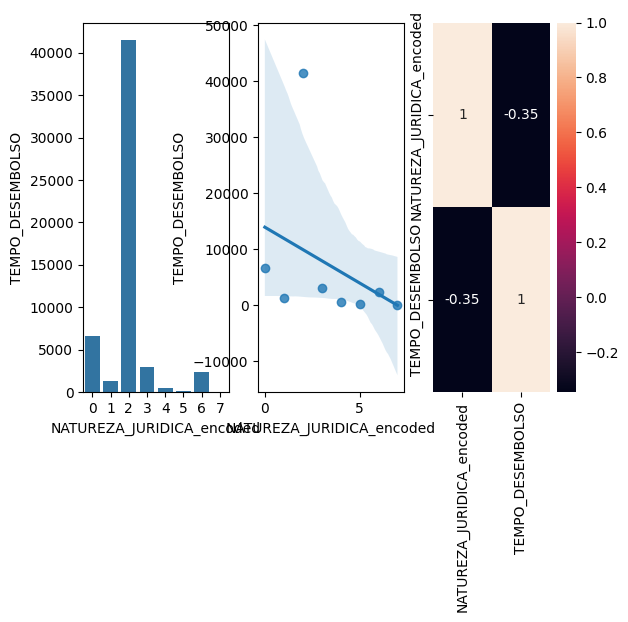

In [ ]:
aux1 = fsa_ml_padrao[['NATUREZA_JURIDICA_encoded', 'TEMPO_DESEMBOLSO']].groupby( 'NATUREZA_JURIDICA_encoded' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='NATUREZA_JURIDICA_encoded', y='TEMPO_DESEMBOLSO', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.regplot( x='NATUREZA_JURIDICA_encoded', y='TEMPO_DESEMBOLSO', data=aux1 )

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True )

#### IQR (Interquartile Range) - Adequado para dados com Distribuição Não Normal, Menos influenciado por valores extremos

In [ ]:
Q1 = np.percentile(fsa_z_score, 25)
Q3 = np.percentile(fsa_z_score, 75)
IQR = Q3 - Q1

# Calcular limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = (fsa_z_score < lower_bound) | (fsa_z_score > upper_bound)

# Criar uma série pandas
fsa_iqr = pd.Series(fsa_z_score)

# Extrair os outliers
outliers_identificados = fsa_iqr[outliers]

print("Outliers identificados (IQR):")
print(outliers_identificados.count())

NameError: name 'fsa_z_score' is not defined

#### Teste de Shapiro-Wilk - Verifica a normalidade dos dados. Um valor p > 0.05 indica que os dados são normalmente distribuídos.

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(fsa_z_score)
print('Estatística do Teste Shapiro-Wilk:', stat)
print('Valor p:', p)
if p > 0.05:
    print('Os dados parecem seguir uma distribuição normal (não rejeitamos H0)')
else:
    print('Os dados não seguem uma distribuição normal (rejeitamos H0)')

NameError: name 'fsa_z_score' is not defined

---

In [ ]:
#Linear Regression for FSA dataset
def linear_regression_fsa(y):
    
    X = fsa_desembolso_numerical[['ANO_CHAMADA_PUBLICA']]

    lin_reg = lm.LinearRegression()
    lin_reg.fit(X, y)
    ypred = lin_reg.predict(X)
    print('Dependent Variable:', y.name)
    print('Coefficient', lin_reg.coef_)
    print('Intercept', lin_reg.intercept_)
    print('MSQERR', msqerr(y, ypred))
    print('R2', lin_reg.score(X,y))

    plt.figure()
    plt.scatter(X,y)
    plt.plot(X, ypred, color='red')
    plt.xlabel('Ano da Chamada Pública')
    plt.ylabel(y.name)

In [ ]:
#Linear Regression for Renúncia fiscal dataset - Classificação de Nivel
def linear_regression_renuncia_fiscal(y):

    X = renuncia_fiscal_numerical[['CLASSIFICACAO_NIVEL_PRODUTORA']]

    lin_reg = lm.LinearRegression()
    lin_reg.fit(X,y)
    ypred = lin_reg.predict(X)

    ypred = lin_reg.predict(X)
    print('Dependent Variable:', y.name)
    print('Coefficient', lin_reg.coef_)
    print('Intercept', lin_reg.intercept_)
    print('MSQERR', msqerr(y, ypred))
    print('R2', lin_reg.score(X,y))

    plt.figure()
    plt.scatter(X,y)
    plt.plot(X, ypred, color='red')
    plt.xlabel('Classificação de Nivel de produtora')
    plt.ylabel(y.name)

Dependent Variable: LEI_8313
Coefficient [-210.15035492]
Intercept 78339.34420287167
MSQERR 73271642436.16594
R2 1.255874313876859e-06


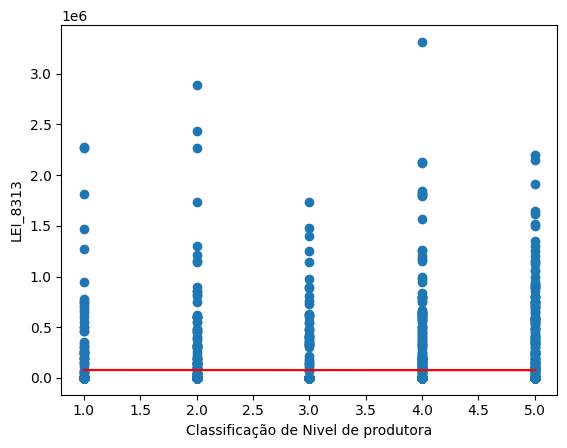

In [ ]:
linear_regression_renuncia_fiscal(renuncia_fiscal_numerical['LEI_8313'])

In [ ]:
#Linear Regression for Renúncia fiscal dataset - Total Captado
def linear_regression_renuncia_fiscal_2(y):

    X = renuncia_fiscal_numerical[['TOTAL_CAPTADO']]

    lin_reg = lm.LinearRegression()
    lin_reg.fit(X,y)
    ypred = lin_reg.predict(X)

    ypred = lin_reg.predict(X)
    print('Dependent Variable:', y.name)
    print('Coefficient', lin_reg.coef_)
    print('Intercept', lin_reg.intercept_)
    print('MSQERR', msqerr(y, ypred))
    print('R2', lin_reg.score(X,y))

    plt.figure()
    plt.scatter(X,y)
    plt.plot(X, ypred, color='red')
    plt.xlabel('TOTAL_CAPTADO')
    plt.ylabel(y.name)

Dependent Variable: CLASSIFICACAO_NIVEL_PRODUTORA
Coefficient [2.07933073e-07]
Intercept 3.2327775336198505
MSQERR 1.9629712025701478
R2 0.057911865242113225


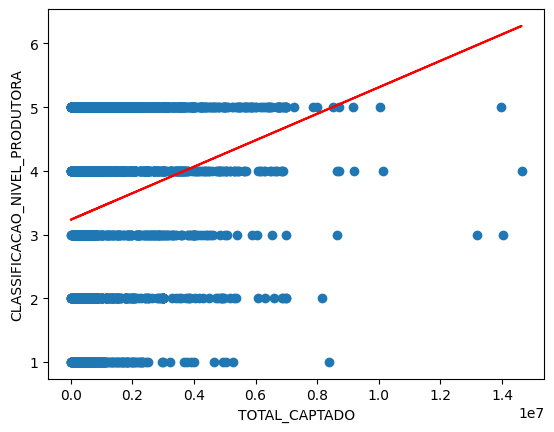

In [ ]:
linear_regression_renuncia_fiscal_2(renuncia_fiscal_numerical['CLASSIFICACAO_NIVEL_PRODUTORA'])

---

#### Hipóteses

##### Hipotese 1 = Empresas com Natureza Jurídica NÃO recebem o desembolso mais rápidos que empresas individuais não há diferenças significativas nos números

### Criação de Hipóteses

#### FSA - Desembolso

* Projetos no Sudeste tem maior probabilidade de serem aprovados
* Projetos captados via natureza jurídica LTDA tem prazo de liberação menor que outras naturezas jurídicas
* Projetos captados via natureza jurídica MEI tem maior chance de serem reprovados 
* O número de projetos aprovados em um estado é diretamente proporcional a quantidade de projetos inscritos, independentemente de localização

#### Renúncia Fiscal

* Projetos no Sudeste tem maior probabilidade de serem aprovados
* Projetos captados via natureza jurídica LTDA tem prazo de liberação menor que outras naturezas jurídicas
* Projetos captados via natureza jurídica MEI tem maior chance de serem reprovados 



Para determinar se uma hipótese é verdadeira ou refutar uma hipótese, você geralmente segue o processo de teste de hipóteses estatísticas. Aqui estão os passos gerais para conduzir um teste de hipóteses:

1. Formule as Hipóteses
Hipótese Nula (H0): A hipótese nula é uma declaração de que não há efeito ou diferença. É a hipótese que você tenta refutar.
Hipótese Alternativa (H1 ou Ha): A hipótese alternativa é uma declaração de que há um efeito ou diferença.
2. Escolha o Nível de Significância (α)
O nível de significância, α, é a probabilidade de rejeitar a hipótese nula quando ela é verdadeira. Comumente, α é escolhido como 0,05, mas pode ser 0,01, 0,10, ou outro valor dependendo do contexto.
3. Selecione o Teste Estatístico Apropriado
O teste estatístico escolhido depende da natureza dos seus dados e da hipótese que você está testando (por exemplo, teste t, teste z, ANOVA, teste qui-quadrado).
4. Calcule a Estatística de Teste e o Valor-p
A estatística de teste é um valor calculado a partir dos seus dados que você compara com um valor crítico para decidir se rejeita H0.
O valor-p é a probabilidade de observar um valor da estatística de teste tão extremo quanto, ou mais extremo do que, o valor observado, sob a hipótese nula.
5. Tome uma Decisão
Rejeitar H0: Se o valor-p for menor que o nível de significância α, você rejeita a hipótese nula em favor da hipótese alternativa.
Não Rejeitar H0: Se o valor-p for maior que o nível de significância α, você não rejeita a hipótese nula.

---